# 電商客戶行為分析與折扣優化



## 0.目錄
1. 專案概述
2. 資料來源
3. 工具使用
4. 套件載入
5. 資料探索及清洗
6. 資料分析<br>
  6-1 單變量分析<br>
  6-2 多變量分析<br>
    * 6A 初步探索
      * 6Aa 目前有多少用戶？其中有多少人至少購買過一次？每位顧客的平均購買次數？
      * 6Ab 用戶購買產品的平均時間？
      * 6Ac 此次購買與上次購買的平均間隔時間？
      * 6Ad 用戶是否在購買前會將產品加入購物車 or 直接購買？
    * 6B 用戶行為分析
      * 6Ba 用戶活躍度
      * 6Bb 用戶行為路徑
    * 6C 產品表現分析
      * 6Ca 價格與購買數量
      * 6Cb 辨識熱門商品
    * 6D 客戶分群分析
      * 6Da RFM 分析模型
7. 特徵工程<br>
  7-1 建立特徵（基於用戶）<br>
  7-2 建立特徵（基於產品 類別/子類別）<br>
  7-3 準備資料供預測模型使用<br>
    * 7A 資料選擇及整併
    * 7B 缺失值插補
    * 7C 類別轉數值
    * 7D 特徵縮放
8. 模型建立
9. 結論與建議
10. 參考資料


## 0.目錄
1. 專案概述
2. 資料來源
3. 工具使用
4. 套件載入
5. 資料探索及清洗
6. 資料分析<br>
  6-1 單變量分析<br>
  6-2 多變量分析<br>
    * 6-2-1 初步探索
      * 6-2-1-1 目前有多少用戶？其中有多少人至少購買過一次？每位顧客的平均購買次數？
      * 6-2-1-2 用戶購買產品的平均時間？
      * 6-2-1-3 此次購買與上次購買的平均間隔時間？
      * 6-2-1-4 用戶是否在購買前會將產品加入購物車 or 直接購買？
    * 6-2-2 用戶行為分析
      * 6-2-2-1 用戶活躍度
      * 6-2-2-2 用戶行為路徑
    * 6-2-3 產品表現分析
      * 6-2-3-1 價格與購買數量
      * 6-2-3-2 辨識熱門商品
    * 6-2-4 客戶分群分析
      * 6-2-4-1 RFM 分析模型
7. 特徵工程<br>
  7-1 建立特徵（基於用戶）<br>
  7-2 建立特徵（基於產品 類別/子類別）<br>
  7-3 準備資料供預測模型使用<br>
    * 7-3-1 資料選擇及整併
    * 7-3-2 缺失值插補
    * 7-3-3 類別轉數值
    * 7-3-4 特徵縮放
8. 模型建立
9. 結論與建議
10. 參考資料


## 1.專案概述

背景源於一家販售各種產品（如家電，3C，食物和飲料，門鎖，嬰兒用品等）的早期電商公司，希望能提升其產品銷售轉化率。為了增加客戶購買意願，該公司打算提供折價券以刺激消費，但由於**折扣活動**的預算有限，因此希望透過分析用戶行為，以決定提供折價券的有利時機，從而優化業務流程。

為此，我們分別從**用戶角度**及**產品角度**進行分析，並使用實務上常見的顧客價值分析方法 - **RFM 模型**，用於客戶分群，以了解不同客戶群體的消費行為，進而提供針對性的營銷策略。此外，我們從用戶消費流程中找出了適合提供折價券的情境，並建立了**預測模型**，該模型用以預測符合上述情境的使用者購買產品的機率，透過該模型，我們能找出潛在放棄消費的用戶，並提供折價券以鼓勵購買，而不是將折價券提供給非常有可能會購買的用戶。最終，我們在不同層面提供了相應的決策建議，並期望透過預測模型提升產品銷售轉化率，以有效利用折扣預算。

## 2.資料來源

* 資料來源：[Open Data on AWS](https://aws.amazon.com/tw/opendata/?wwps-cards.sort-by=item.additionalFields.sortDate&wwps-cards.sort-order=desc)
* 資料期間：2019年1月1日至2019年12月22日
* 資料集：[Datasets](https://github.com/ThomasTsao47/Ecommerce_Project/blob/main/Data/customer_data.xlsx)
* 欄位字典：

| 欄位名稱 | 描述 |
|----------|------|
| **User_id** | 用戶的 ID |
| **Session_id** | 每個 Session 的 ID |
| **DateTime** | 動作發生的時間戳，格式為 YYYY-MM-DD HH:MM:SS |
| **Category** | 商品的主類別 |
| **SubCategory** | 商品的子類別 |
| **Action** | 用戶執行的動作 |
| **Quantity** | 購買的商品數量 |
| **Rate** | 單個商品的價格 |
| **Total Price** | 總價（Quantity 乘以 Rate） |

## 3.工具使用

* 程式語言：Python 3.10.12（pandas、numpy、matplotlib、seaborn、sklearn、 spacy、datetime）
* AI工具：[ChatGPT-4o](https://openai.com/index/hello-gpt-4o/)（提供分析框架靈感及數據洞察，代碼優化），[Claude 3.5](https://www.anthropic.com/news/claude-3-5-sonnet)（提供用戶行為路徑流程圖設計靈感）
* 繪圖軟體：[draw.io](https://app.diagrams.net/)（製作預測模型情境圖）


## 4.套件載入

In [ ]:
# 連接雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 常用套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
pd.set_option('display.max_rows',400)
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',None)

from datetime import timedelta
import gc

# spaCy 的英文模型
import spacy
nlp = spacy.load('en_core_web_sm')

# Feature Encoding
from sklearn.preprocessing import OneHotEncoder

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# ML Model
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 5.資料探索及清洗

進入分析前，須先了解每個資料欄位（特徵）的意義並觀察資料是否有重複,缺失,異常等情形，並思考特徵之間的可能關係，以及哪些可能是影響業務決策的關鍵指標，甚至進一步想到配合業務情境可能的建模需求。有了上述的觀察與頭腦風暴後，接著就進行資料清洗，目標是排除上述提到的資料情形，使同欄位的資料格式趨於一致，以便後續的分析。

In [ ]:
# 資料載入
customer_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/OpenData/customer_data.xlsx')
customer_df

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2085,58113870922,tyjgtrhr-y75-4d97-44444,20/3/2019 21:26:00,Women Fashion,Kurti,click_wishlist_page,NaN,NaN,NaN
2086,58113870922,dedfgd6-bf3c-4488-86dfg,20/3/2019 21:34:00,Women Fashion,Kurti,add_to_cart,NaN,NaN,NaN
2087,58113870922,sdgfre6-2837-484a-ae455,20/3/2019 21:36:00,Women Fashion,Kurti,checkout,NaN,NaN,NaN
2088,58113870922,fdgdfff-2837-484a-ae4545,20/3/2019 21:42:00,Women Fashion,Kurti,purchase,8.0,1200.0,9600.0


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User_id      2090 non-null   int64  
 1   Session_id   2090 non-null   object 
 2   DateTime     2090 non-null   object 
 3   Category     2090 non-null   object 
 4   SubCategory  2090 non-null   object 
 5   Action       2090 non-null   object 
 6   Quantity     201 non-null    float64
 7   Rate         201 non-null    float64
 8   Total Price  201 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 147.1+ KB


**觀察**
* 初步發現 `Quantity, Rate, Total Price` 這三個欄位有較多缺失值，將在後面進行了解

In [ ]:
# 檢查是否有重複值
customer_df[customer_df.duplicated()]

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price


In [ ]:
# 查看 User_id, Session_id 兩個欄位的唯一值數量
print(f"'User_id'的唯一值數量：{customer_df['User_id'].nunique()}")
print(f"'Session_id'的唯一值數量：{customer_df['Session_id'].nunique()}\n")

'User_id'的唯一值數量：401
'Session_id'的唯一值數量：2064



以下檢查 `Category, SubCategory, Action` 這三個欄位是否有拼寫錯誤（typos）或不一致（inconsistency），須將文字進行調整。例如：
* `Category` 出現 'Music\n'，須將單詞兩側的分隔符號去除
* `Category` 出現 'Air conditioner' 及 'Air Conditioner'兩種值，須將兩者統一文字規則，例如統一為 'Air Conditioner'，以確保後續分析數據之正確性

In [ ]:
# Implementation of lemmatization words using Spacy

def lemmatize_word(word):
  '''
  定義一個函數來進行詞形還原
  '''
  # 使用 spaCy 處理文本
  doc = nlp(word)

  # 萃取 lemmatized tokens
  lemmatized_tokens = [token.lemma_ for token in doc]

  # 將詞形還原後的tokens合起來
  lemmatized_text = ' '.join(lemmatized_tokens)

  return lemmatized_text

def typos_fixed(data_Series):
  '''
  寫規則，修正拼寫錯誤（Typos）及不一致（inconsistency）
  '''
  # 去除單詞兩側的分隔符號
  data_Series = data_Series.str.strip()

  # 應用詞形還原
  data_Series = data_Series.apply(lemmatize_word)

  # 將每個單詞的首字母轉換為大寫
  data_Series = data_Series.str.title()

  # 調整文字使規則一致
  data_Series = data_Series.str.replace(' And ', ' & ').str.replace(" 'S", "'s")

  return data_Series

In [ ]:
# 檢查 'Category' 是否有拼寫錯誤（Typos）或不一致（inconsistency）
catg = customer_df["Category"].value_counts().sort_index()
print(f"'Category'修正前的唯一值數量：{len(catg)}\n")
catg

'Category'修正前的唯一值數量：105



Category
Accessories                91
Air Conditioner            18
Air conditioner             1
Appliances                 18
Artwork                     7
Audio                       5
Baby Care                  23
Baby Products              17
Bags and Luggage           29
Bed room                   31
Bike care                  11
Books                      15
Camera                      9
Camera Accessories         45
Car Accessories            16
Cleaning supplies          13
Computer Peripherals       14
Desktop Accessories         3
Digital Appliances         22
Digital Content            20
Digital Devices           101
Electrical tools           10
Electricals                10
Electronic Appliances      47
Electronics                14
Entertainment Systems      29
Essentials                  3
Fitness                    77
Food and drinks             5
Food essentials            16
Footwear                   27
Furnitures                 20
Gaming Accessories         27
G

In [ ]:
# 修正 'Category'
customer_df["Category"] = typos_fixed(customer_df["Category"])

# 針對特定詞進行處理
customer_df['Category'].replace("Kid Fashion", "Kid's Fashion", inplace=True)

# 查看修正前後結果
catg_fixed = customer_df["Category"].value_counts().sort_index()
print(f"'Category'修正前的唯一值數量：{len(catg)}")
print(f"'Category'修正後的唯一值數量：{len(catg_fixed)}")

'Category'修正前的唯一值數量：105
'Category'修正後的唯一值數量：101


In [ ]:
# 檢查 'SubCategory' 是否有拼寫錯誤（Typos）或不一致（inconsistency）
subcatg = customer_df["SubCategory"].unique()
subcatg.sort()
print(f"'SubCategory'修正前的唯一值數量：{len(subcatg)}\n")
subcatg

'SubCategory'修正前的唯一值數量：364



array(['Air Tight Container', 'Air conditioner', 'Air coolers',
       'Amazon Alexa', 'Amplifier', 'Arm sleeve', 'Audio Speakers',
       'Aux Cable', 'Baby Shampoo', 'Baby Shower gel', 'Baby Soap',
       'Baby care set', 'Baby lotion', 'Baby wipes', 'Backpack',
       'Bangles', 'Barbie doll', 'Barcode scanners', 'Bathroom Fitings',
       'Batteries', 'Bean bags', 'Beard Oil', 'Belt', 'Beverages',
       'Bike polish', 'Binoculars', 'Blankets', 'Blazer',
       'Blood pressure monitor', 'Bluetooth speakers', 'Body lotion',
       'Book containers', 'Books', 'Bow tie', "Boxer's", 'Boxing Bag',
       'Bp monitors', 'Bracelet', 'Bracelets', 'Bulbs', 'Bumpers',
       'CD-Driver', 'Cad game', 'Camera Bag', 'Camera Lens',
       'Camera slider', 'Camphor box', 'Candle', 'Car Mobile holder',
       'Car charger', 'Car cover', 'Car freshner', "Cargo's", 'Carpet',
       'Cases', 'Cases and Covers', 'Cat food', "Cd's", 'Charger',
       'Charging wire', 'Chimneys', 'Chocolates', 'Chromeca

In [ ]:
# 修正 'SubCategory'
customer_df["SubCategory"] = typos_fixed(customer_df["SubCategory"])

# 針對特定詞進行處理
customer_df['SubCategory'].replace("Kid Tshirt", "Kid's Tshirt", inplace=True)
customer_df['SubCategory'].replace("Dumbell", "Dumbbell", inplace=True)
customer_df["SubCategory"] = customer_df["SubCategory"].str.replace(" - ", "-")

# 查看修正前後結果
subcatg_fixed = customer_df["SubCategory"].value_counts().sort_index()
print(f"'SubCategory'修正前的唯一值數量：{len(subcatg)}")
print(f"'SubCategory'修正後的唯一值數量：{len(subcatg_fixed)}")

'SubCategory'修正前的唯一值數量：364
'SubCategory'修正後的唯一值數量：351


In [ ]:
# 檢查 'Action' 是否有拼寫錯誤（Typos）或不一致（inconsistency）
act = customer_df["Action"].value_counts().sort_index()
print(f"'Action'修正前的唯一值數量：{len(act)}\n")
act

'Action'修正前的唯一值數量：13



Action
add_review              69
add_to_cart            280
add_to_wishist           5
add_to_wishlist         33
checkout               202
click_wishlist_page    202
first_app_open         121
product_review          22
product_view           292
purchase               201
read_review              1
read_reviews           342
search                 320
Name: count, dtype: int64

In [ ]:
# 修正 'Action'，針對特定詞進行處理
customer_df['Action'].replace("add_to_wishist", "add_to_wishlist", inplace=True)
customer_df['Action'].replace("read_reviews", "read_review", inplace=True)

# 查看修正前後結果
act_fixed = customer_df["Action"].value_counts().sort_index()
print(f"'Action'修正前的唯一值數量：{len(act)}")
print(f"'Action'修正後的唯一值數量：{len(act_fixed)}")

'Action'修正前的唯一值數量：13
'Action'修正後的唯一值數量：11


In [ ]:
# 查看 Quantity, Rate, Total Price 三個欄位非缺失值的 row
temp = customer_df[customer_df['Quantity'].notna()]
print(temp.shape)
temp.head()

(201, 9)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
13,51629142904,b5bdd3-4ca2-4c55-939e,2019-09-03 18:10:00,Clean Supply,Clean Spray,purchase,5.0,300.0,1500.0
21,51629142904,fbdhyrt4ca2-4c55-939e,2019-01-10 21:08:00,Mobile & Accessory,Charge Wire,purchase,2.0,2000.0,4000.0
42,51940324591,rtfghf9-2748-4c56-87565,2019-04-08 19:09:00,Mobile & Accessory,Case,purchase,5.0,100.0,500.0
55,51965507652,d40a28-41f9-4325-bbae,2019-12-10 19:25:00,Digital Device,Headphone,purchase,4.0,1000.0,4000.0
67,51940324591,yhfghfgh-77f8-40c9-8e5786,2019-12-10 13:07:00,Fitness,Dumbbell,purchase,2.0,1000.0,2000.0


**觀察**
* `Quantity, Rate, Total Price` 這三個欄位有較多缺失值，原因是僅在購買事件發生時（`Action` = 'purchase'），此三個欄位才會有資料

In [ ]:
# 確認非缺失值的 row 中，Quantity*Rate 是否皆等於 Total Price
(temp['Quantity']*temp['Rate'] == temp['Total Price']).sum()

201

In [ ]:
# 調整資料型態 - 將 DateTime 欄位轉換為 datetime 格式
customer_df['DateTime'] = pd.to_datetime(customer_df['DateTime'])

In [ ]:
print(customer_df.shape)
customer_df.head(3)

(2090, 9)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speaker,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speaker,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jean,search,NaN,NaN,NaN


## 6.資料分析

此章節將透過單變量分析來掌握特徵的資料分布，並透過多變量分析了解特徵間的關係，以便後續能在**特徵工程**和**模型建立**的章節中有所幫助。

### 6-1 單變量分析

In [ ]:
# 資料集時間範圍
print("Min Date: " +str(customer_df['DateTime'].min()))
print("Max Date: " +str(customer_df['DateTime'].max()))
print("Range: " +str(customer_df.DateTime.max()-customer_df.DateTime.min()))

Min Date: 2019-01-01 11:00:00
Max Date: 2019-12-22 17:52:00
Range: 355 days 06:52:00


**`Category` 資料分布**

'Category'的唯一值數量: 101



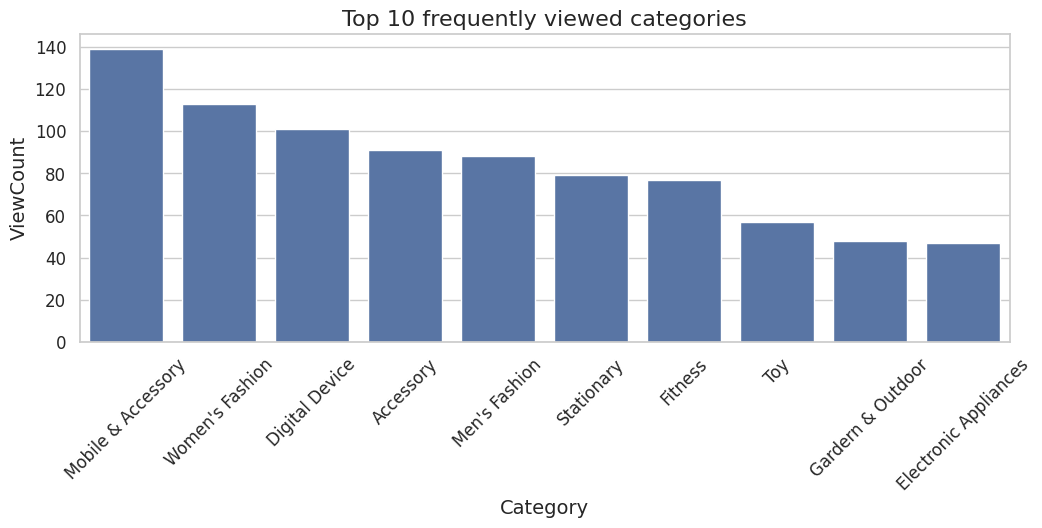

In [ ]:
# 設定figure大小
plt.figure(figsize=(12,4))

# 計算每個類別的計數並排序，篩選前10名的類別
order = customer_df['Category'].value_counts().nlargest(10).index
data = customer_df[customer_df['Category'].isin(order)]

# 繪圖
print(f"'Category'的唯一值數量: {customer_df['Category'].nunique()}\n")
sns.countplot(data, x='Category', order=order)

# 設定圖標題，軸標籤及刻度
plt.title('Top 10 frequently viewed categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('ViewCount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

**`SubCategory` 資料分布**

'SubCategory'的唯一值數量: 351



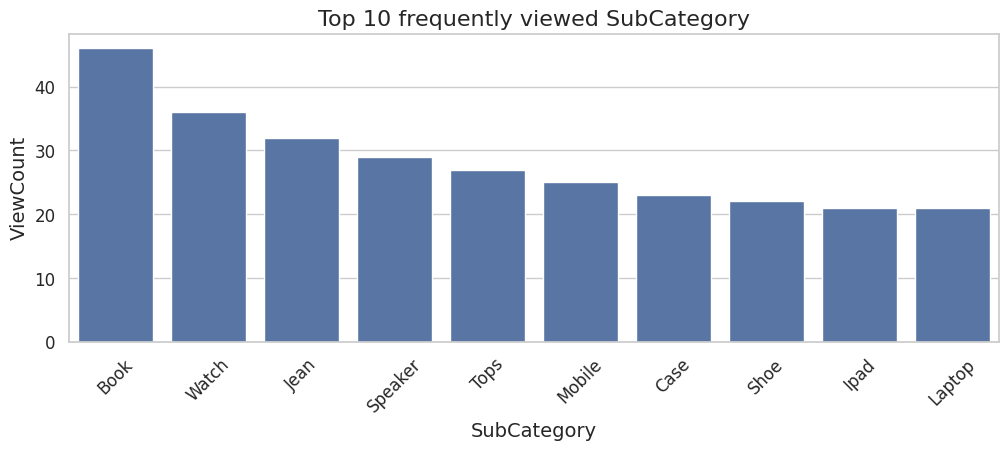

In [ ]:
# 設定figure大小
plt.figure(figsize=(12,4))

# 計算每個類別的計數並排序，篩選前10名的子類別
order = customer_df['SubCategory'].value_counts().nlargest(10).index
data = customer_df[customer_df['SubCategory'].isin(order)]

# 繪圖
print(f"'SubCategory'的唯一值數量: {customer_df['SubCategory'].nunique()}\n")
sns.countplot(data, x='SubCategory', order=order)

# 設定圖標題，軸標籤及刻度
plt.title('Top 10 frequently viewed SubCategory', fontsize=16)
plt.xlabel('SubCategory', fontsize=14)
plt.ylabel('ViewCount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

**`Action` 資料分布**

'Action'的唯一值數量: 11



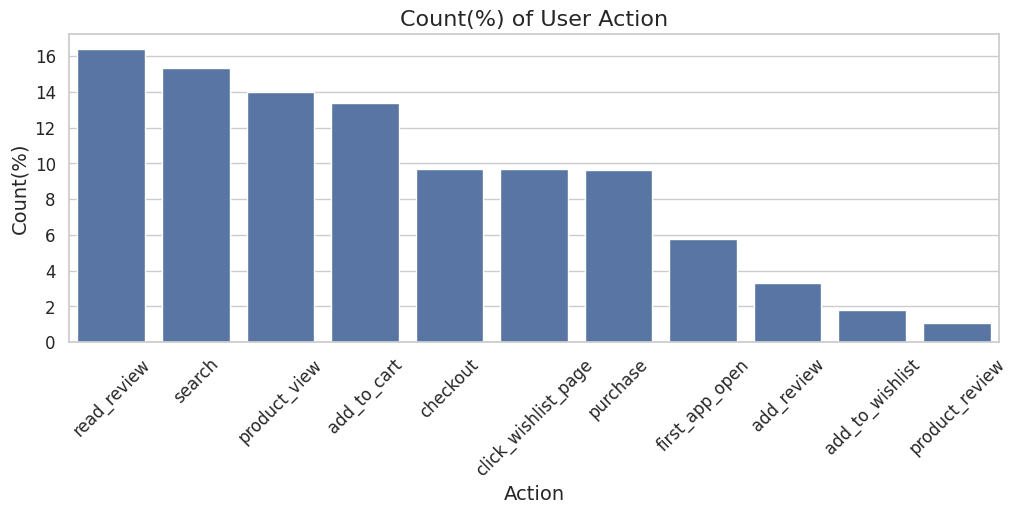

In [ ]:
# 設定figure大小
plt.figure(figsize=(12,4))

# 計數使用者行為並排序
order = customer_df['Action'].value_counts().index
data = customer_df[customer_df['Action'].isin(order)]

# 繪圖
print(f"'Action'的唯一值數量: {customer_df['Action'].nunique()}\n")
sns.countplot(data, x='Action', order=order, stat="percent")

# 設定圖標題，軸標籤及刻度
plt.title('Count(%) of User Action', fontsize=16)
plt.xlabel('Action', fontsize=14)
plt.ylabel('Count(%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

以下的 `Quantity, Rate, Total Price` 皆為數值型特徵，我們除了掌握特徵的資料分布外，也將採用**非參數方法**，使用**分位數**進行**離群值檢測**，透過將數據點進行大小順序，比較每個數據點與其他數據點的差距來辨識離群值，從中若有發現與其他數據點顯著不同的點將被視為離群值。

**`Quantity` 資料分布**

'Quantity'整體資料的敘述統計:
count    201.00
mean       2.97
std        7.16
min        1.00
10%        1.00
25%        1.00
50%        2.00
75%        3.00
80%        3.00
90%        5.00
95%        7.00
97%       10.00
99%       10.00
max      100.00
Name: Quantity, dtype: float64

'Quantity'小於第99百分位數(含)的資料筆數: 200


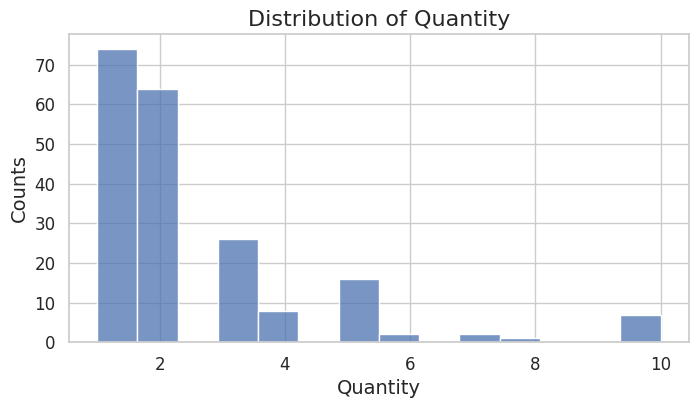

In [ ]:
# 設定figure大小
plt.figure(figsize=(8,4))

# 透過敘述統計觀察資料分布及離群值
summary_stats = customer_df['Quantity'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99]).round(2)
print(f"'Quantity'整體資料的敘述統計:\n{summary_stats}\n")

# 繪圖(排除離群值)
data = customer_df[customer_df['Quantity'] <= customer_df['Quantity'].quantile(0.99)]
print(f"'Quantity'小於第99百分位數(含)的資料筆數: {data.shape[0]}")
sns.histplot(data, x='Quantity')

# 設定圖標題，軸標籤及刻度
plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

In [ ]:
# 查看 'Quantity'=100 的資料
customer_df[customer_df['Quantity']==100]

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
1484,57767840151,dfxdf936-c74d-4002-a076,2019-10-09 21:53:00,Stationary,Pen,purchase,100.0,10.0,1000.0


**觀察**
* 'Pen' 的購買數量有 100 支在電商平台上是有可能的，判斷非異常資料，但仍屬離群值，因此後續預測模型中若有用到 `Quantity` 欄位，則須將此筆資料進行處理

**`Rate` 資料分布**

'Rate'整體資料的敘述統計:
count      201.00
mean      7133.28
std      14778.15
min         10.00
10%        200.00
25%        500.00
50%       1200.00
75%       6000.00
80%       7500.00
90%      20000.00
95%      40000.00
97%      50000.00
99%      80000.00
max      90000.00
Name: Rate, dtype: float64

Q3+1.5*IQR = 14250
'Rate'小於 Q3+1.5*IQR (含)的資料筆數: 172


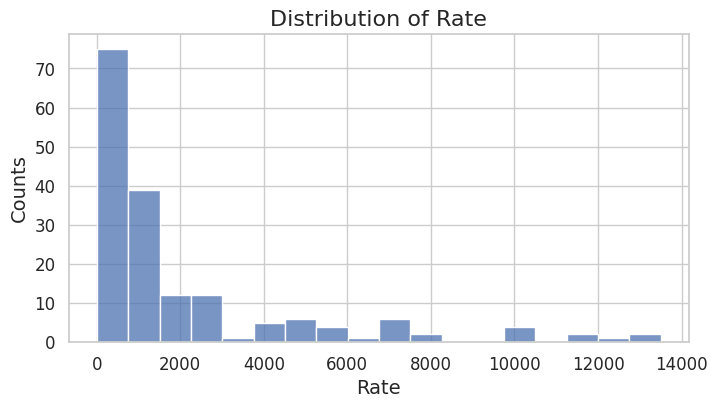

In [ ]:
# 設定figure大小
plt.figure(figsize=(8,4))

# 透過敘述統計觀察資料分布及離群值
summary_stats = customer_df['Rate'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99]).round(2)
print(f"'Rate'整體資料的敘述統計:\n{summary_stats}\n")

# 繪圖(排除離群值)
IQR = customer_df['Rate'].quantile(0.75) - customer_df['Rate'].quantile(0.25)
upper_limit = customer_df['Rate'].quantile(0.75) + 1.5*IQR
data = customer_df[customer_df['Rate'] <= upper_limit]
print(f"Q3+1.5*IQR = {int(upper_limit)}")
print(f"'Rate'小於 Q3+1.5*IQR (含)的資料筆數: {data.shape[0]}")
sns.histplot(data, x='Rate')

# 設定圖標題，軸標籤及刻度
plt.title('Distribution of Rate', fontsize=16)
plt.xlabel('Rate', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

In [ ]:
# 查看 'Rate'>14,250 的資料
customer_df[customer_df['Rate']>14250]

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
85,51613167885,b8e28c8-d11f-428a-95e7,2019-10-31 15:28:00,Mobile & Accessory,Mobile,purchase,3.0,20000.0,60000.0
106,51795247161,2ea16b-4ec3-44f8-8fcd,2019-03-10 23:55:00,Digital Device,Tws Earbud,purchase,2.0,15000.0,30000.0
166,51945183373,opwke5a-7b33e-4b3d-95a9,2019-02-26 11:37:00,Digital Device,Printer,purchase,1.0,30000.0,30000.0
480,51626168971,0ac92940-754e-4cee-baaf,2019-10-21 17:14:00,Digital Device,Laptop,purchase,1.0,45000.0,45000.0
545,51526464449,dsgx8b4-31e-44a6-832b,2019-09-25 14:38:00,Digital Appliance,Laptop,purchase,1.0,50000.0,50000.0
557,51526464449,khmuyj4-e81e-4fa6-84562,2019-10-28 18:23:00,Digital Appliance,Monitor,purchase,1.0,15000.0,15000.0
566,51895612143,c0811104-1194-40f7-92b8,2019-10-23 19:27:00,Large Appliance,Washing Machine,purchase,1.0,50000.0,50000.0
569,52112239597,3c248863-9b7f-493f-a4fa,2019-10-23 19:48:00,Furniture,Sofa,purchase,1.0,40000.0,40000.0
610,51978529551,2df9d466-2b47-4e01-a432,2019-10-25 19:19:00,Music,Amplifier,purchase,1.0,25000.0,25000.0
680,51565158157,be0e1bd7-15c7-49d8-9b76,2019-10-11 13:40:00,Women's Fashion,Jewellery,purchase,3.0,16000.0,48000.0


In [ ]:
# 查看 'Rate'>14,250 的產品參考價位中位數
higher_rate_SubCategory = customer_df[customer_df['Rate']>14250]['SubCategory'].unique()
for subcatg in higher_rate_SubCategory:
  median_rate = customer_df[(customer_df['SubCategory']==subcatg)]['Rate'].median()
  print(f"Median rate of {subcatg}: {int(median_rate)}")

Median rate of Mobile: 20000
Median rate of Tws Earbud: 15000
Median rate of Printer: 30000
Median rate of Laptop: 47500
Median rate of Monitor: 15000
Median rate of Washing Machine: 50000
Median rate of Sofa: 40000
Median rate of Amplifier: 25000
Median rate of Jewellery: 16000
Median rate of Gaming Console: 25000
Median rate of Wooden Shelf: 25000
Median rate of Drum Set: 20000
Median rate of Play Station: 15000
Median rate of Portable Projector: 16000
Median rate of Gaming Laptop: 90000
Median rate of Mobile Phone: 50000
Median rate of Tv: 85000
Median rate of Notebook: 42000
Median rate of Dslr: 35000
Median rate of Smart Watch: 45000
Median rate of Surround System: 12200
Median rate of Ipad: 72500
Median rate of Fully Automate: 18000
Median rate of Mattress: 15000
Median rate of Wooden Sofa Set: 35000
Median rate of Watch: 5500
Median rate of Treadmill: 30000


In [ ]:
# 查看 'SubCategory' 為 'Watch' 或 'Smart Watch' 的資料
customer_df[(customer_df['SubCategory'].isin(['Watch', 'Smart Watch'])) & (customer_df['Rate'].notna())]

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
94,51945183373,oukujm-uiy-7bbe-4b3d-95a9,2019-04-10 18:45:00,Accessory,Watch,purchase,1.0,3000.0,3000.0
527,51517997197,gdsx61e-90324-423d4-0ddb,2019-07-18 18:27:00,Accessory,Watch,purchase,1.0,7000.0,7000.0
1540,56348505101,f430d6b6-9810-4582-9aa4,2019-10-11 19:08:00,Smart Wearables,Smart Watch,purchase,1.0,45000.0,45000.0
1807,60302643179,7u6tif8-b5e7-4fa1-b876,2019-07-18 21:06:00,Accessory,Watch,purchase,1.0,4000.0,4000.0
1860,60034334067,f0da7937-bc95-4f97-9607,2019-11-11 21:51:00,Accessory,Watch,purchase,1.0,35000.0,35000.0


**觀察**
* 僅發現 'Watch' 的價位中位數小於 14,250元 較多，而資料中也有價位較高的 'Smart Watch'，因此判斷上面 `Rate` > 14,250 的資料中，`Rate` 為 35,000元 的 'Watch' 應該是類似 'Smart Watch' 的產品
* 上面 `Rate` > 14,250 的資料中，多為 3C 及家具等價位較高的產品，因此判斷非異常資料，但仍屬離群值，因此後續預測模型中若有用到 `Rate` 欄位，則須將這部分的資料進行處理

**`Total Price` 資料分布**

'Total Price'整體資料的敘述統計:
count       201.00
mean       9455.37
std       18213.70
min         150.00
10%         500.00
25%        1000.00
50%        2500.00
75%        8000.00
80%       10000.00
90%       30000.00
95%       45000.00
97%       50000.00
99%       85000.00
max      160000.00
Name: Total Price, dtype: float64

Q3+1.5*IQR = 18500
'Total Price'小於 Q3+1.5*IQR (含)的資料筆數: 172


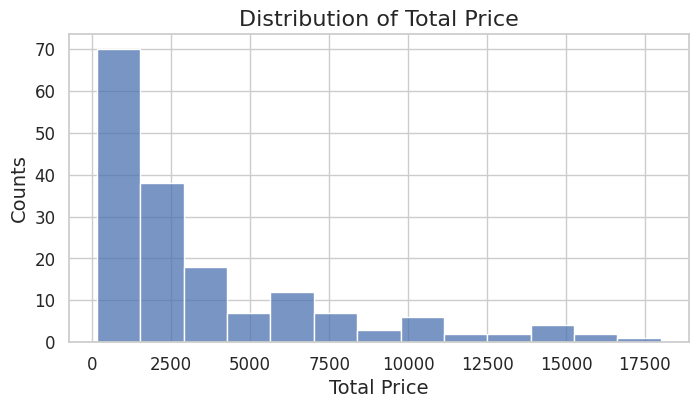

In [ ]:
# 設定figure大小
plt.figure(figsize=(8,4))

# 透過敘述統計觀察資料分布及離群值
summary_stats = customer_df['Total Price'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99]).round(2)
print(f"'Total Price'整體資料的敘述統計:\n{summary_stats}\n")

# 繪圖(排除離群值)
IQR = customer_df['Total Price'].quantile(0.75) - customer_df['Total Price'].quantile(0.25)
upper_limit = customer_df['Total Price'].quantile(0.75) + 1.5*IQR
data = customer_df[customer_df['Total Price'] <= upper_limit]
print(f"Q3+1.5*IQR = {int(upper_limit)}")
print(f"'Total Price'小於 Q3+1.5*IQR (含)的資料筆數: {data.shape[0]}")
sns.histplot(data, x='Total Price')

# 設定圖標題，軸標籤及刻度
plt.title('Distribution of Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

In [ ]:
# 查看 'Total Price'>18,500 的產品
customer_df.loc[customer_df['Total Price']>18500, 'SubCategory'].unique()

array(['Mobile', 'Tws Earbud', 'Printer', 'Laptop', 'Tripod',
       'Surround System', 'Washing Machine', 'Sofa', 'Amplifier', 'Jean',
       'Jewellery', 'Gaming Console', 'Wooden Shelf', 'Camera Lens',
       'Drum Set', 'Gaming Laptop', 'Mobile Phone', 'Tv', 'Notebook',
       'Dslr', 'Smart Watch', 'Ipad', 'Mattress', 'Wooden Sofa Set',
       'Watch', 'Treadmill'], dtype=object)

**觀察**
* `Total Price` > 18,500 的資料中，多是上述提到價位較高的產品，因此判斷非異常資料，但仍屬離群值。後續將利用此欄位建立 **RFM** 的部分特徵欄位，再用於預測模型

### 6-2 多變量分析

多變量分析有助於我們了解兩個或多個特徵的關係以及其與潛在目標變數的關係。



#### 初步探索

我們首先想了解一些直覺上會想到的問題：
* 目前有多少用戶？其中有多少人至少購買過一次？每位顧客的平均購買次數？
* 用戶購買產品的平均時間？
* 此次購買與上次購買的平均間隔時間？
* 用戶是否在購買前會將產品加入購物車 or 直接購買？


##### 目前有多少用戶？其中有多少人至少購買過一次？每位顧客的平均購買次數？

In [ ]:
# 篩選有購買行為的資料
purchase_data = customer_df[customer_df['Action'] == 'purchase']

# 計算用戶總數
total_users = customer_df['User_id'].nunique()
print(f"總用戶數: {total_users}")

# 計算至少購買過一次的用戶數
purchasers = purchase_data['User_id'].nunique()
print(f"至少購買過一次的用戶數: {purchasers}，佔總用戶比例: {round(purchasers/total_users*100,2)}%")

# 計算每位顧客的平均購買次數
average_purchases_per_user = purchase_data.groupby('User_id').size().mean()
print(f"每位顧客的平均購買次數: {average_purchases_per_user:.2f}")

總用戶數: 401
至少購買過一次的用戶數: 167，佔總用戶比例: 41.65%
每位顧客的平均購買次數: 1.20


##### 用戶購買產品的平均時間？

In [ ]:
# 每位顧客的購買次數
purchase_count = purchase_data.groupby('User_id').size().reset_index()
purchase_count.rename(columns={0: 'cnt'}, inplace=True)

# 統計購買次數
print(purchase_count['cnt'].value_counts(), '\n')

cnt
1    135
2     30
3      2
Name: count, dtype: int64 



根據上面購買次數的統計，多數用戶目前僅消費過一次，為避免計算上弄太複雜，我們決定從只購買過一次的用戶資料來大概了解平均購物時間。此外，由於多數時候如果我們是第一次瀏覽某個電商平台的新用戶，一開始用在了解平台所耗費的時間應不宜計入用戶購買產品的平均時間，因此我們決定以離用戶購買行為發生的最近一次主動搜尋產品 （即`Action` = 'search'）的時間作為統計用戶購買產品的起始時間，而以購買行為發生（`Action` = 'purchase'）作為結束時間。

In [ ]:
# 篩選只購買過一次的用戶
only_once_purchasers = purchase_count.loc[purchase_count['cnt']==1, ['User_id']]
customer_df_only_once_pur = customer_df[customer_df['User_id'].isin(only_once_purchasers['User_id'])]

# 進一步篩選有發生 'search' 行為的用戶
search_counts = customer_df_only_once_pur[customer_df_only_once_pur['Action'] == 'search'].groupby('User_id').size()
customer_df_only_once_pur_with_search = customer_df_only_once_pur[customer_df_only_once_pur['User_id'].isin(search_counts.index)]

In [ ]:
# 排除非購買商品的 'search' 行為
temp = customer_df_only_once_pur_with_search[customer_df_only_once_pur_with_search['Action'] == 'purchase']
temp1 = temp.groupby(['User_id', 'Category', 'SubCategory']).size().reset_index()
temp1.drop(0, axis=1, inplace=True)
temp2 = pd.merge(customer_df_only_once_pur_with_search, temp1, on=['User_id', 'Category', 'SubCategory'], how='inner')

In [ ]:
# 將每位用戶id及其購買時間轉換為字典一一對應
user_datetime_dict = temp[['User_id', 'DateTime']].set_index('User_id')['DateTime'].to_dict()

def filter_by_timing(df):
  """
  篩選每位用戶在購買行為發生(含)以前的資料
  """
  user_id = df['User_id'].iloc[0]
  timing = user_datetime_dict[user_id]
  return df[df['DateTime'] <= timing]

# 排除發生在購買商品後的資料，避免後續計算到購買後的 'search' 行為
filtered_df = temp2.groupby('User_id').apply(filter_by_timing).reset_index(drop=True)

In [ ]:
# 計算用戶購買產品的時間
latest_search_timing = filtered_df[filtered_df['Action']=='search'].groupby('User_id')['DateTime'].max().to_frame().reset_index()
latest_search_timing.rename(columns={'DateTime': 'latest_search_timing'}, inplace=True)
purchase_timing = filtered_df.groupby('User_id')['DateTime'].max().to_frame().reset_index()
purchase_timing.rename(columns={'DateTime': 'purchase_timing'}, inplace=True)
search_before_purchase = latest_search_timing.merge(purchase_timing, how='left', on='User_id')

purchase_time_days = (search_before_purchase['purchase_timing']-search_before_purchase['latest_search_timing']).dt.days
purchase_time_mins = (search_before_purchase['purchase_timing']-search_before_purchase['latest_search_timing']).dt.total_seconds()/60
purchase_time_days_DS = purchase_time_days.describe(percentiles=[0.25, 0.5, 0.6, 0.75]).round(2)
purchase_time_mins_DS = purchase_time_mins.describe(percentiles=[0.25, 0.5, 0.6, 0.75]).round(2)
print(f"用戶購買產品的時間(天):\n{purchase_time_days_DS}\n")
print(f"用戶購買產品的時間(分鐘):\n{purchase_time_mins_DS}")

用戶購買產品的時間(天):
count     43.00
mean      13.72
std       38.41
min        0.00
25%        0.00
50%        0.00
60%        0.00
75%        1.50
max      188.00
dtype: float64

用戶購買產品的時間(分鐘):
count        43.00
mean      19988.42
std       55448.29
min           0.00
25%          15.50
50%          27.00
60%          31.80
75%        3500.50
max      271200.00
dtype: float64


**觀察**

* **半數的用戶在30分鐘以內完成購買**：
   - 大部分用戶在短時間內完成購買，因為以天為單位的數據顯示中位數小於1天，而第75百分位數也僅為1.5天
   - 以分鐘為單位的數據也顯示，大部分用戶在短時間內完成購買，因為第60百分位數僅為31.80分鐘

* **少數用戶的長購買周期**：
   - 標準差非常大，特別是在分鐘單位下，達到了55,448.29分鐘（約38天）。這表明存在少數用戶需要很長時間才完成購買，導致數據有較大的變異
   - 最大值也顯示有些用戶的購買周期非常長，達到了271,200分鐘（約188天）


##### 此次購買與上次購買的平均間隔時間？

這裡我們僅採計購買超過1次的用戶，計算其每次購買的平均間隔時間

In [ ]:
# 統計購買次數(購買超過1次)
print(purchase_count.loc[purchase_count['cnt']>1, 'cnt'].value_counts())

# 篩選購買超過1次的用戶
twice_purchasers = purchase_count.loc[purchase_count['cnt']==2, ['User_id']]
purchase_data_twice_pur = purchase_data[purchase_data['User_id'].isin(twice_purchasers['User_id'])]
third_purchasers = purchase_count.loc[purchase_count['cnt']==3, ['User_id']]
purchase_data_third_pur = purchase_data[purchase_data['User_id'].isin(third_purchasers['User_id'])]

cnt
2    30
3     2
Name: count, dtype: int64


In [ ]:
# 計算用戶消費的時間間隔(購買過2次)
purchase_data_twice_pur = purchase_data_twice_pur.sort_values(by=['User_id', 'DateTime'])
twice_pur_diff = purchase_data_twice_pur.groupby('User_id').agg({'DateTime': lambda x: list(x)}).reset_index()
twice_pur_diff['avg_days_between_purchase'] = twice_pur_diff['DateTime'].apply(lambda x: (x[1]-x[0]).days)

# 計算用戶消費的時間間隔(購買過3次)
purchase_data_third_pur = purchase_data_third_pur.sort_values(by=['User_id', 'DateTime'])
third_pur_diff = purchase_data_third_pur.groupby('User_id').agg({'DateTime': lambda x: list(x)}).reset_index()
third_pur_diff['avg_days_between_purchase'] = third_pur_diff['DateTime'].apply(lambda x: ((x[1]-x[0]).days+(x[1]-x[0]).days)/2)

# 統整資料
purchase_with_days_diff = pd.concat([twice_pur_diff, third_pur_diff], ignore_index=True)
purchase_with_days_diff.head(3)

,User_id,DateTime,avg_days_between_purchase
0,51448162784,"[2019-06-11 13:23:00, 2019-12-12 19:22:00]",184.0
1,51462598385,"[2019-10-20 17:30:00, 2019-12-15 19:03:00]",56.0
2,51463622150,"[2019-10-14 21:44:00, 2019-11-12 21:27:00]",28.0


In [ ]:
# 敘述統計用戶消費時間間隔
print(f"用戶消費時間間隔(天):\n{purchase_with_days_diff['avg_days_between_purchase'].describe().round(2)}")

用戶消費時間間隔(天):
count     32.00
mean     103.47
std       76.76
min        0.00
25%       35.25
50%       95.50
75%      177.25
max      245.00
Name: avg_days_between_purchase, dtype: float64


**觀察**

- **購買週期的多樣性**：
  - 用戶購買產品的時間間隔存在較大的變異，標準差為76.76天（RSD = 74.2%），表明用戶之間的購買週期存在較大的差異
  - 最大時間間隔達到了245天，這表示有些用戶在長時間內沒有再次購買產品


**補充：判斷數據是否存在較大的變異**

**相對標準差（RSD 或 CV）**：

* 相對標準差（Relative Standard Deviation, RSD），也稱為變異係數（Coefficient of Variation, CV），它是標準差與平均值的比值

* 判斷數據是否存在較大的變異，可以將標準差與平均值進行比較，並考慮數據的分佈情況。標準差是一個統計指標，可用來衡量資料集的分散程度，即數據偏離平均值的程度。因此，標準差的大小通常相對於平均值來評估

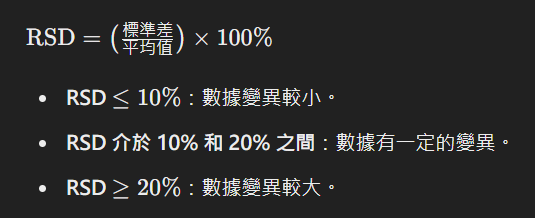<br>


**應用在當前用戶購買產品時間間隔的數據為例**：

- 平均值（mean）為 103.47 天
- 標準差（std）為 76.76 天

計算相對標準差（RSD）：（76.76 / 103.47）* 100% = 74.2%

相對標準差 74.2% 是一個相對較高的值，這表明用戶購買產品的時間間隔存在較大的變異。

##### 用戶是否在購買前會將產品加入購物車 or 直接購買？

為簡化計算，這裡我們認定的方式如下：
* 消費過的用戶數：過往只要有消費過，無論次數，皆認定為 1 個用戶數
* 在購買前加入購物車的用戶數：過往只要有消費過，並且曾經將商品加入購物車，無論次數，皆認定為 1 個用戶數
* 直接購買的用戶數(未加入購物車)：消費過的用戶數 - 在購買前加入購物車的用戶數

In [ ]:
# 購買過商品的用戶資料
purchasers_list = purchase_data['User_id'].unique()
customer_df_purchasers = customer_df[customer_df['User_id'].isin(purchasers_list)]

# 在購買前有 'add_to_cart' 行為的用戶
add_to_cart_purchasers = customer_df_purchasers[(customer_df_purchasers['Action'] == 'add_to_cart')]
num_add_to_cart_purchasers = add_to_cart_purchasers['User_id'].nunique()

# 直接購買的用戶 (無 'add_to_cart' 行為)
num_direct_purchasers = purchasers - num_add_to_cart_purchasers

print(f"消費過的用戶數: {purchasers}")
print(f"在購買前加入購物車的用戶數: {num_add_to_cart_purchasers} (佔總消費用戶比例: {round(num_add_to_cart_purchasers/purchasers*100,2)}%)")
print(f"直接購買的用戶數(未加入購物車): {num_direct_purchasers} (佔總消費用戶比例: {round((num_direct_purchasers)/purchasers*100,2)}%)\n")

# 沒購買過商品的用戶資料
customer_df_NonPurchasers = customer_df[~customer_df['User_id'].isin(purchasers_list)]

# 沒購買過商品但有 'add_to_cart' 行為的用戶
add_to_cart_NonPurchasers = customer_df_NonPurchasers[(customer_df_NonPurchasers['Action'] == 'add_to_cart')]
num_add_to_cart_NonPurchasers = add_to_cart_NonPurchasers['User_id'].nunique()

# 沒購買過商品亦無 'add_to_cart' 行為的用戶
num_non_add_to_cart_NonPurchasers = customer_df_NonPurchasers['User_id'].nunique() - num_add_to_cart_NonPurchasers

#print(f"沒消費過的用戶數: {total_users-purchasers}")
#print(f"加入購物車的用戶數(未購買): {num_add_to_cart_NonPurchasers}")
#print(f"無購買的用戶數(亦無加入購物車): {num_non_add_to_cart_NonPurchasers}")

消費過的用戶數: 167
在購買前加入購物車的用戶數: 147 (佔總消費用戶比例: 88.02%)
直接購買的用戶數(未加入購物車): 20 (佔總消費用戶比例: 11.98%)



**觀察**

- **多數用戶在購買前會將產品加入購物車**：
   - 其中 147 位用戶在購買商品前會將產品加入購物車，占總消費用戶的 88.02%
   - 這表明大多數用戶在購買前會先將產品加入購物車，這可能是因為他們還要選購其他商品，或是需要進一步比較、考慮後再進行購買

**總結與建議**

  * 大多數用戶在電商平台上進行購物的過程是快速且高效的，但也存在少數用戶需要更長的時間來完成購買。這可能是因為他們在決策過程中需要更多的時間，或者他們在多次訪問後才完成購買
  * 用戶在電商平台上的購買週期存在較大的差異，有些用戶在長時間內沒有再次購買產品，建議對於購買間隔較長的用戶，制定針對性的營銷策略，通過促銷、提醒等手段促進他們的再次購買
  * **針對加入購物車的用戶**：
    - **提醒和促銷**：可以設置購物車提醒，通過電子郵件或推播通知提醒用戶完成購買，或是提供針對性優惠或折扣，促使用戶在購物車中的商品更快結帳，特別是在他們的購物車中有商品數天未結帳時
  * **針對直接購買的用戶**：
    - **快速結帳體驗**：優化直接購買流程，確保用戶可以快速便捷地完成購買，提升購物體驗

有了上述問題的初步了解後，從下個小節開始會針對特定面向進行分析

#### 用戶行為分析

- **用戶活躍度**：分析用戶活躍時間，透過 `DateTime` 欄位來觀察用戶在哪些時間段最活躍
- **用戶行為路徑**：追踪用戶在網站上的行為路徑，透過 `Action` 欄位觀察用戶從 'first_app_open' 到最終 'purchase'，分析不同路徑的轉化情形

##### 用戶活躍度

In [ ]:
customer_df['Date'] = customer_df['DateTime'].dt.date
customer_df['Month'] = customer_df['DateTime'].dt.month
customer_df['DayOfWeek'] = customer_df['DateTime'].dt.strftime('%a')
customer_df['Hour'] = customer_df['DateTime'].dt.hour

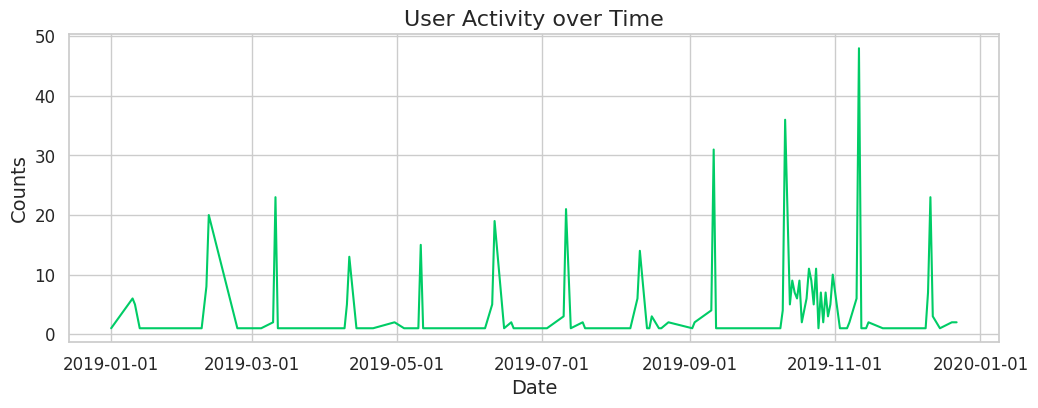

In [ ]:
from matplotlib.dates import DateFormatter

# 設定figure大小
plt.figure(figsize=(12,4))

# 繪圖
sns.lineplot(customer_df, x='Date', y='User_id', estimator='nunique', errorbar=None, color='#00CC66')

# 設定圖標題，軸標籤及刻度
plt.title('User Activity over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 設置 x 軸標籤的日期格式，以顯示完整日期（例如:顯示 2019-03-01 而不是 2019-03）
date_form = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)

# 顯示圖片
plt.show()

**觀察**
- **用戶活動高峰期**：圖中顯示出多個用戶活躍度高峰期，特別是在2019年的幾個特定月份，如9月至11月。這些高峰期可能與特定的節日有關，例如：11月的高峰期可能與“雙十一”購物節有關，這是一個全球性的網購促銷活動。此外，亦發現用戶行為活躍的情形多落在每月月中以前，猜測可能是公司的促銷活動多落在此期間
- **用戶活動低谷期**：在2019年的某些月份，如4月至8月的用戶活動較低。可能表明這些月份缺乏大型促銷活動或節日，因此用戶訪問量相對較少



下圖查看用戶活躍情形與產品平均價格的變化趨勢，以驗證上述**高峰期**的猜測是否合理。

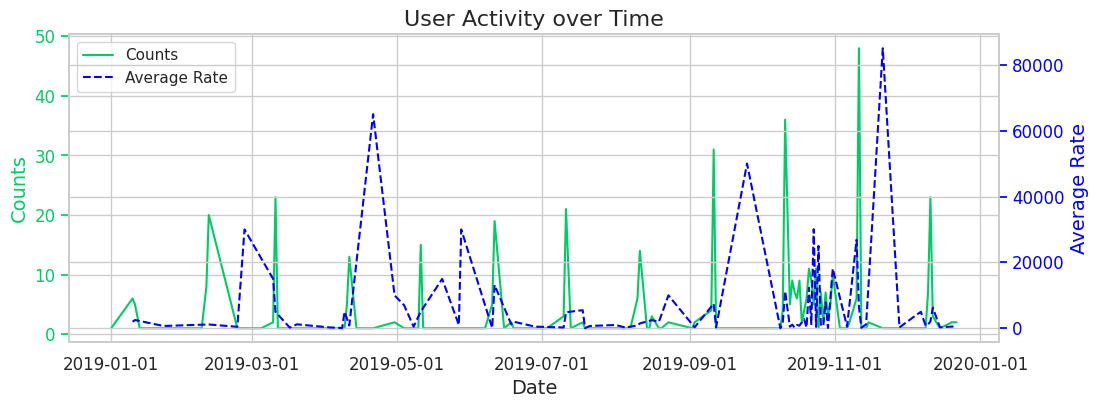

In [ ]:
from matplotlib.dates import DateFormatter

# 設定figure大小
fig, ax1 = plt.subplots(figsize=(12, 4))

# 繪製User_id的count圖
sns.lineplot(customer_df, x='Date', y='User_id', estimator='nunique', errorbar=None, color='#00CC66', ax=ax1, label='Counts')

# 設定圖標題，軸標籤及刻度
ax1.set_title('User Activity over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Counts', fontsize=14, color='#00CC66')
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.tick_params(axis='y', labelsize=12, colors='#00CC66')

# 設置 x 軸標籤的日期格式，以顯示完整日期（例如:顯示 2019-03-01 而不是 2019-03）
date_form = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_form)

# 創建第二個y軸，共用x軸
ax2 = ax1.twinx()

# 繪製價格的平均值圖
sns.lineplot(customer_df, x='Date', y='Rate', estimator='mean', errorbar=None, color='blue', ax=ax2, label='Average Rate', linestyle='--')

# 設定第二個y軸的標籤
ax2.set_ylabel('Average Rate', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelsize=12, colors='blue')

# 先去掉全部圖例，避免圖例重複出現
ax1.legend().remove()
ax2.legend().remove()

# 添加圖例
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# 顯示圖片
plt.show()


**觀察**
* 確實在用戶較為活躍的時間點所消費的產品平均價格較低，可能說明公司在此期間的促銷活動成功吸引到重視價格的用戶進行消費

下面我們也從不同時間維度，包含月（Month），星期（Day of Week）及小時（Hour），查看用戶活躍情形。

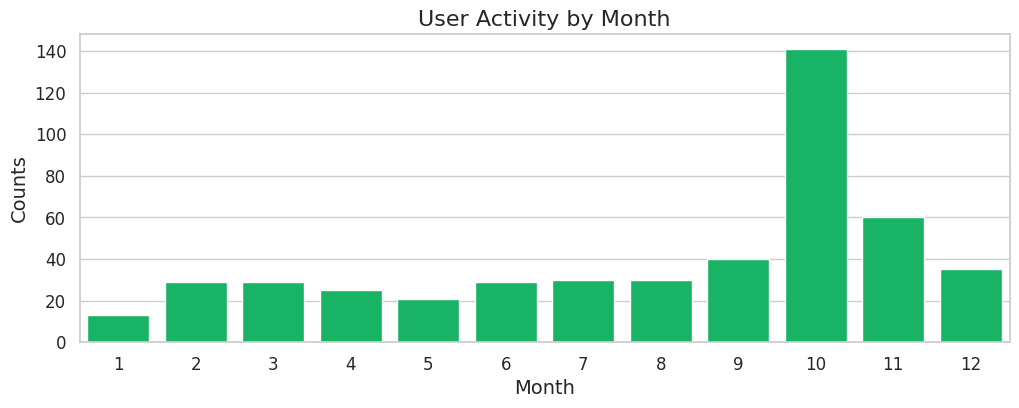

In [ ]:
# 設定figure大小
plt.figure(figsize=(12,4))

# 繪圖
monthly_activity = customer_df.groupby('Month')['User_id'].nunique()
sns.barplot(x=monthly_activity.index, y=monthly_activity.values, color='#00CC66')

# 設定圖標題，軸標籤及刻度
plt.title('User Activity by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

**觀察**

- **10月及11月活躍度最高**：從圖中可以明顯看出，10月至11月的用戶活躍度高於其他月份。這可能是因為11月有雙十一購物節，而在那之前可能有一系列的預熱活動（Pre-Sale）
- **其餘月份活躍度較均勻**：除10月及11月外，其他月份的用戶活躍度相對均勻，沒有特別突出的月份


**補充 - 行銷活動的前期預熱**

* 預熱（Pre-Sale）的操作，在電商的行銷活動規劃中十分常見，特別是在節慶或是雙十一、三八女王節…等大檔期，在活動的前幾周，甚至在一個月前，部分品牌就已經摩拳擦掌，設計了各種形式的預熱，以搶消費者的目光、錢包。（引自 [Running Mate Marketing, 2022](https://runningmatemarketing.com/blog/2022/09/14/%E8%A1%8C%E9%8A%B7%E6%B4%BB%E5%8B%95-5-%E7%A8%AE%E9%A0%90%E7%86%B1%E6%96%B9%E5%BC%8F/#:~:text=%E5%9C%A8%E8%A1%8C%E9%8A%B7%E6%B4%BB%E5%8B%95%E7%9A%84%E8%A6%8F%E5%8A%83%E4%B8%8A%EF%BC%8C%E8%8B%A5%E5%81%9A%E5%A5%BD%E9%A0%90%E7%86%B1%EF%BC%8C%E5%B0%B1%E8%83%BD%E6%8F%90%E6%97%A9%E6%90%B6%E4%BD%94%E6%B6%88%E8%B2%BB%E8%80%85%E7%9A%84%E6%B3%A8%E6%84%8F%E5%8A%9B%EF%BC%8C%E6%8F%90%E5%8D%87%E5%A4%A7%E5%AE%B6%E5%B0%8D%E6%B4%BB%E5%8B%95%E7%9A%84%E9%97%9C%E6%B3%A8%E5%BA%A6%EF%BC%8C%E9%80%8F%E9%81%8E%E5%90%84%E9%A1%9E%E5%9E%8B%E7%9A%84%E9%A0%90%E7%86%B1%E6%B4%BB%E5%8B%95%EF%BC%8C%E8%83%BD%E9%80%90%E6%AD%A5%E5%A0%86%E7%96%8A%E6%B6%88%E8%B2%BB%E8%80%85%E5%B0%8D%E6%B4%BB%E5%8B%95%E7%9A%84%E6%9C%9F%E5%BE%85%EF%BC%8C%E4%B8%A6%E5%9C%A8%E6%B4%BB%E5%8B%95%E7%95%B6%E5%A4%A9%E5%81%9A%E6%B6%88%E8%B2%BB%E3%80%82,%E6%9C%80%E9%87%8D%E8%A6%81%E7%9A%84%E6%98%AF%EF%BC%8C%E4%B9%9F%E8%AE%93%E4%BB%96%E5%80%91%E7%9F%A5%E9%81%93%E8%87%AA%E5%B7%B1%E7%9A%84%E9%8C%A2%E5%8C%85%E5%BF%85%E9%A0%88%E7%82%BA%E4%BA%86%E9%80%99%E5%80%8B%E6%B4%BB%E5%8B%95%E5%81%9A%E9%A0%90%E7%95%99%EF%BC%8C%E5%90%A6%E5%89%87%E6%B4%BB%E5%8B%95%E9%82%84%E6%B2%92%E5%88%B0%EF%BC%8C%E5%A4%A7%E5%AE%B6%E7%9A%84%E9%8C%A2%E5%8C%85%E9%83%BD%E5%B7%B2%E7%B6%93%E6%89%81%E4%BA%86%EF%BC%8C%E8%B2%B7%E5%85%B6%E5%AE%83%E5%93%81%E7%89%8C%E7%9A%84%E5%95%86%E5%93%81%EF%BC%8C%E6%88%96%E6%98%AF%E5%90%84%E7%A8%AE%E7%94%9F%E6%B4%BB%E9%96%8B%E9%8A%B7%EF%BC%8C%E5%B0%B1%E8%AE%93%E5%A4%A7%E5%AE%B6%E6%8E%8F%E4%B8%8D%E5%87%BA%E9%8C%A2%E4%BA%86%E3%80%82)）

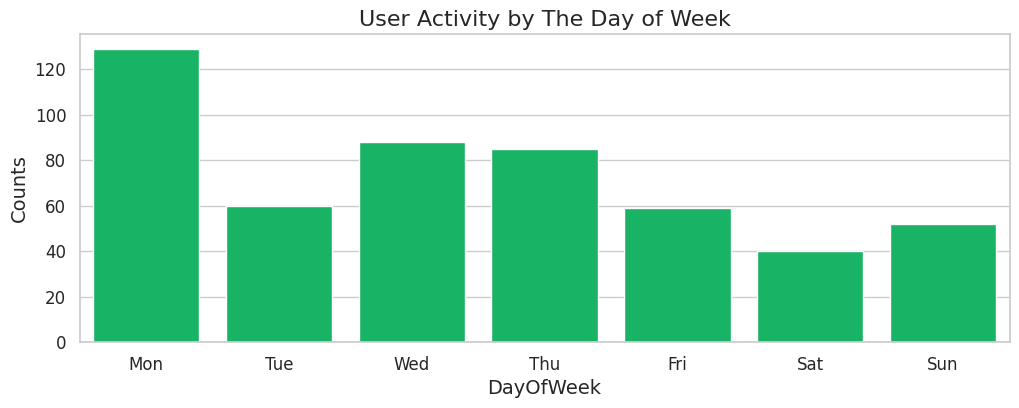

In [ ]:
# 設定figure大小
plt.figure(figsize=(12,4))

# 自定義的星期順序
week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# 繪圖
weekly_activity = customer_df.groupby('DayOfWeek')['User_id'].nunique()
weekly_activity = weekly_activity.reindex(week_order)
sns.barplot(x=weekly_activity.index, y=weekly_activity.values, color='#00CC66')

# 設定圖標題，軸標籤及刻度
plt.title('User Activity by The Day of Week', fontsize=16)
plt.xlabel('DayOfWeek', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

**觀察**

- **週一活躍度最高**：用戶在週一的活躍度最高，這可能是因為週一通常是新的工作週的開始，用戶可能會利用週一來進行網購計劃或查找新的產品，以釋放 Blue Monday 的沮喪😆
- **週三和週四活躍度較高**：除了週一，週三和週四的用戶活躍度也比較高，這可能是因為週中有某些促銷活動
- **週六活躍度最低**：週六的用戶活躍度最低，這可能是因為用戶在週末通常會有其他的休閒活動，而非網購

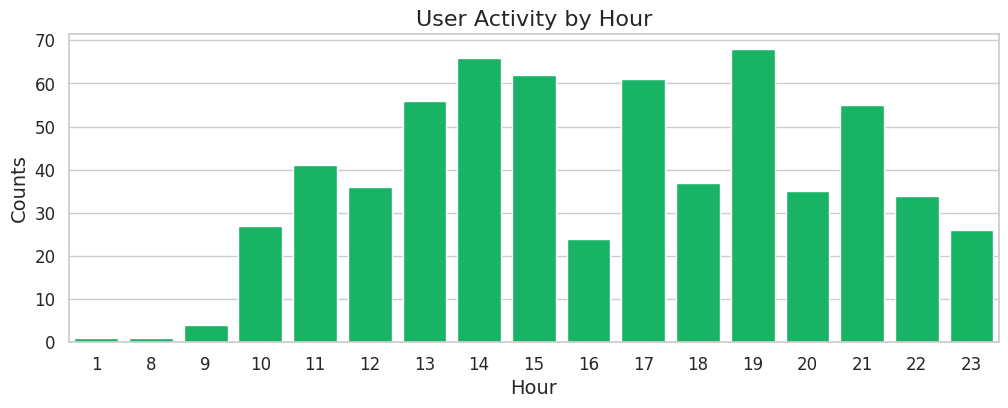

In [ ]:
# 設定figure大小
plt.figure(figsize=(12,4))

# 繪圖
hourly_activity = customer_df.groupby('Hour')['User_id'].nunique()
sns.barplot(x=hourly_activity.index, y=hourly_activity.values, color='#00CC66')

# 設定圖標題，軸標籤及刻度
plt.title('User Activity by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# 顯示圖片
plt.show()

**觀察**

- **下午2點至3點和傍晚5點及7點活躍度高**：用戶在下午2點到3點（午休時間結束後）以及晚上5點及7點（下班時間）的活躍度最高
- **清晨和深夜活躍度低**：早上8點之前和晚上11點之後的用戶活躍度較低，這符合人們的日常作息規律，通常在這些時間段較少進行網購

**總結與建議**

- 用戶活躍度和平均價格之間存在一定的相關性
- 潛在的促銷活動顯著影響用戶的訪問行為
- 通過進一步分析這些高峰期和低谷期的詳細數據，可以更好地理解用戶行為和營銷活動的效果，從而優化未來的市場策略
- 潛在的促銷活動或節日顯著影響用戶的月度活躍度，特別是10月及11月
- 週一的活躍度最高，可能是因為新的工作週開始，用戶開始進行網購計劃或查找新的產品，以釋放 Blue Monday 的沮喪😆
- 下午和晚間是用戶活躍的高峰時段，這些時間段可能是推廣活動的最佳時機

以上發現可以幫助公司制定更有效的營銷策略，並在適當的時間點進行推廣活動和促銷活動，以最大化用戶參與度及轉化率。例如，在週一或下午和晚間進行推廣活動可能會獲得更好的效果。

##### 用戶行為路徑

這裡我們想了解導致 購買/沒購買 的常見使用者行為路徑，並確定使用者體驗中能進行優化的潛在部分。

In [ ]:
customer_df.head(3)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Date,Month,DayOfWeek,Hour
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speaker,first_app_open,NaN,NaN,NaN,2019-01-10,1,Thu,10
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speaker,search,NaN,NaN,NaN,2019-01-10,1,Thu,10
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jean,search,NaN,NaN,NaN,2019-01-10,1,Thu,14


In [ ]:
# 原始用戶行為路徑
user_path_notSplit = customer_df.sort_values(by=['User_id', 'DateTime']).groupby('User_id')['Action'].apply(lambda x: ','.join(x)).to_frame()
#print(user_path_notSplit.head(3), '\n')

# 把同一位用戶行為路徑按照每次'purchase'的循環拆成多個行為路徑
user_path_split = user_path_notSplit['Action'].str.replace(",purchase,", ",purchase-----").str.split("-----", expand=True)

# 整合每個行為循環路徑
user_path_integrated = []
for col in user_path_split.columns:
  user_path_integrated.extend(user_path_split[col].str.strip().to_list())
user_path_integrated = [i for i in user_path_integrated if i!=None]

# 用戶 有購買 的路徑
user_path_with_purchase = [i for i in user_path_integrated if 'purchase' in i]
user_path_count_with_purchase = pd.Series(user_path_with_purchase, name='user_path').value_counts().head(15)
print(f"用戶有購買 - 行為路徑前15名:\n{user_path_count_with_purchase}\n\n")

# 用戶 尚未購買/沒完成購買 的路徑
user_path_no_purchase = [i for i in user_path_integrated if 'purchase' not in i]
user_path_count_no_purchase = pd.Series(user_path_no_purchase, name='user_path').value_counts().head(15)
print(f"用戶尚未購買/沒完成購買 - 行為路徑前15名:\n{user_path_count_no_purchase}")

用戶有購買 - 行為路徑前15名:
user_path
add_to_cart,checkout,purchase                                                                                   25
checkout,purchase                                                                                               18
click_wishlist_page,add_to_cart,checkout,purchase                                                               14
read_review,click_wishlist_page,add_to_cart,checkout,purchase                                                   11
read_review,add_to_cart,checkout,purchase                                                                        8
product_view,read_review,add_to_cart,checkout,purchase                                                           5
product_view,read_review,click_wishlist_page,add_to_cart,checkout,purchase                                       5
search,product_view,read_review,add_to_cart,checkout,purchase                                                    4
search,read_review,add_to_cart,checkout,purchase    

**觀察**

- **用戶有購買 - 行為路徑前15名**：
  - 幾乎都包含以下行為：add_to_cart,checkout,purchase
  
- **用戶尚未購買/沒完成購買 - 行為路徑前15名**：
  - **用戶評論的重要性**：許多路徑涉及使用者閱讀評論，例如「first_app_open,search,product_view,read_review」，這凸顯了用戶評論在決策過程中的重要性。然而，後續沒購買可能表明評論不是壓倒性的推薦，或者可能無法滿足用戶的需求
  - **查看願望清單頁面和加入購物車後沒購買**：多種路徑涉及使用者進到願望清單頁面或將產品加入購物車，例如「product_view,read_review,click_wishlist_page」，「read_review,click_wishlist_page,add_to_cart」等，這可能表明缺乏立即購買的緊迫性或是其他原因
  - **首次開啟應用程式的使用者探索行為較多**：包含「first_app_open」的路徑例如「first_app_open,search,product_view,read_review」，「first_app_open,search」等，這可能是由於首次使用應用程式的使用者可能會花更多時間瀏覽產品資訊，但購買意願可能尚未建立


**總結與建議**

* **最佳化結帳流程**：由於「加入購物車、結帳、購買」是常見路徑，因此確保結帳流程順暢、步驟簡易及具人性化
* **有針對性的促銷**：可考慮為潛在加入購物車但沒完成購買的用戶提供限時折扣；針對加入願望清單的用戶進行再行銷活動，例如提供限時折扣或搭配推薦商品進行捆綁的優惠促銷，增加購買誘因
* **首次用戶參與**：為首次使用應用程式的用戶提供入門體驗及教程，並凸顯產品亮點及推薦熱門商品，引導他們完成首次購買流程
* **A/B 測試**：嘗試不同的產品頁面元素、評論呈現方式或行動呼籲按鈕設計（Call-to-Action Button, CTA Button），看看是否能提高轉化率



#### 產品表現分析

- **價格與購買數量**：透過 `Rate` 和 `Quantity` 欄位分析價格與購買數量的關係，以了解客戶偏好
- **辨識熱門產品**：透過 `Category`、`SubCategory` 和 `Action`欄位找出較常購買的產品類別和子類別


##### 價格與購買數量

我們首先查看存在購買紀錄的所有產品，其價格與購買數量的相關性。接著透過回歸圖來了解產品價格與購買數量的分布及關係，以了解客戶偏好。由於資料中存在離群值，使得圖形觀察不易，因此回歸圖中我們會予以排除。



In [ ]:
# 整體資料下，Quantity 與 Rate 的相關性
purchase_data[['Quantity', 'Rate']].corr()
#purchase_data.select_dtypes(include=['number']).corr()

,Quantity,Rate
Quantity,1.000000,-0.111059
Rate,-0.111059,1.000000


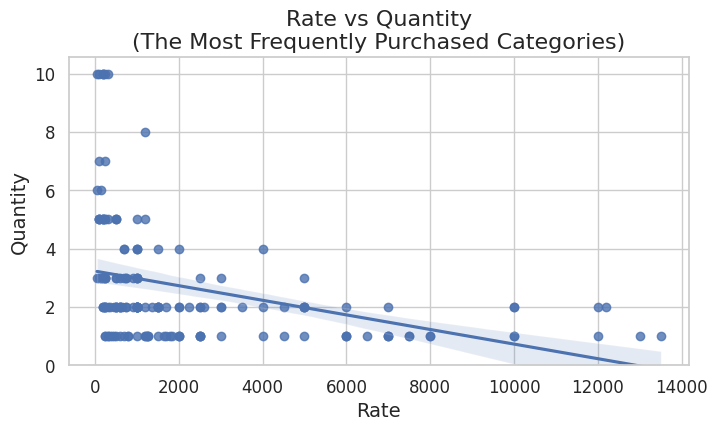

In [ ]:
# 設定figure大小
plt.figure(figsize=(8,4))

# 繪圖
IQR = customer_df['Rate'].quantile(0.75) - customer_df['Rate'].quantile(0.25)
upper_limit = customer_df['Rate'].quantile(0.75) + 1.5*IQR
data_no_outlier = purchase_data[(purchase_data['Rate'] <= upper_limit) & (purchase_data['Quantity'] <= customer_df['Quantity'].quantile(0.99))]
sns.regplot(data=data_no_outlier, x="Rate", y="Quantity")

# 設定圖標題，軸標籤，刻度及軸邊界
plt.title('Rate vs Quantity\n(The Most Frequently Purchased Categories)', fontsize=16)
plt.xlabel('Rate', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.ylim(0, None)

# 顯示圖片
plt.show()

**觀察**

* **價格與購買數量之間的負相關**：圖中的趨勢線顯示出價格（Rate）與購買數量（Quantity）之間存在負相關關係。這意味著當產品價格較高時，購買數量通常較低；而當產品價格較低時，購買數量通常較高
* **低價產品的高銷量**：價格在 0 到 2000 之間的產品購買數量相對較高，有多個點集中在這一區域，購買數量可達到 4 到 10 之間
* **高價產品的低銷量**：價格超過 6000 以上的產品購買數量介於 1-2 之間
* **中價產品的銷量分佈**：價格介於 2000 到 6000 之間的產品，購買數量介於 1-4 之間，顯示這個價格區間內的產品仍有一定的市場需求

**總結與建議**

* **針對低價產品的營銷策略**：由於低價產品的購買數量較高，可以針對這些產品進行更多的推廣活動，以進一步提升銷量
* **高價產品的定位和價值傳遞**：高價產品的購買數量較低，這可能是因為消費者對其價值認知不夠明確。可以通過加強高價產品的品牌宣傳和價值傳遞來提升消費者的購買意願。例如，強調產品的獨特性、品質和使用體驗，讓消費者覺得物有所值
* **產品組合銷售**：可以考慮將不同價格區間的產品進行組合銷售，以提升整體銷量。例如，可以將高價產品與低價產品組合銷售，提供額外的優惠，吸引消費者購買

##### 辨識熱門商品

透過熱點圖呈現熱門產品類別和子類別的購買次數，可用以優化產品供應和營銷策略。

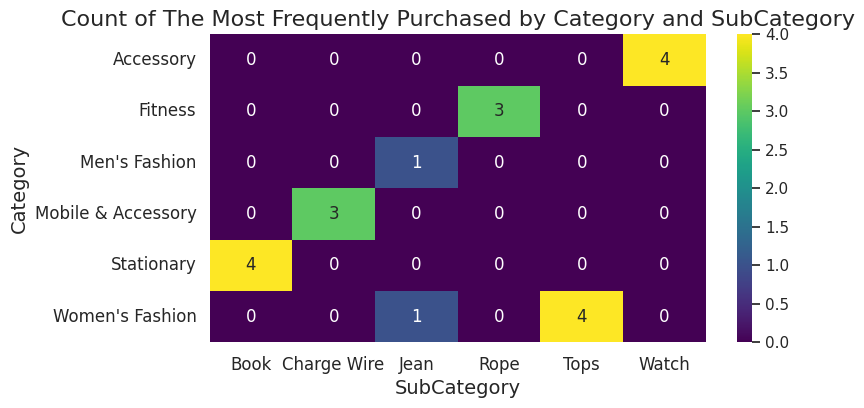

In [ ]:
# 篩選有購買行為的資料
purchase_data = customer_df[customer_df['Action'] == 'purchase']

# 計算每個 Category 和 SubCategory 的購買次數
category_purchase_counts = purchase_data['Category'].value_counts()
subcategory_purchase_counts = purchase_data['SubCategory'].value_counts()

# 選擇購買次數最多的前10個類別和子類別
top_categories = category_purchase_counts.nlargest(10).index
top_subcategories = subcategory_purchase_counts.head(10).index

# 篩選資料，只保留最熱門的類別和子類別
filtered_purchase_data = purchase_data[(purchase_data['Category'].isin(top_categories)) & (purchase_data['SubCategory'].isin(top_subcategories))]

# 創建 pivot table，計算熱門 Category 和 SubCategory 的購買次數
pivot_table = pd.pivot_table(filtered_purchase_data, values='User_id', index='Category', columns='SubCategory', aggfunc='count', fill_value=0)

# 視覺化 pivot table 結果
plt.figure(figsize=(8,4))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='viridis')
plt.title('Count of The Most Frequently Purchased by Category and SubCategory', fontsize=16)
plt.xlabel('SubCategory', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


**觀察**

* **主類別中最受歡迎的子類別對應**：
  * **Stationary：Book**
  * **Mobile & Accessory：Charge Wire**
  * **Women's Fashion：Tops**
  * **Accessory：Watch**
  * **Fitness：Rope**


**總結與建議**

* **提升熱門子類別的曝光度和促銷活動**：可以針對最受歡迎的子類別（如 Stationary 類別中的 Book 和 Women's Fashion 類別中的 Tops）進行更多的促銷活動，以進一步提升銷量
* **產品組合銷售**：可以考慮將熱門子類別的產品與其他相關產品進行組合銷售，以提升整體銷量
* **客戶反饋和產品改進**：收集客戶對熱門產品的反饋，進行產品品質再提升，從而提升用戶滿意度和復購率

#### 客戶分群分析

根據客戶的瀏覽、搜尋、產品檢視、評論和購買等行為，可將客戶劃分為不同的群體，並分析每個群體的特徵,如年齡、性別和地理位置等,以了解不同客戶群的偏好。<br>
考量資料集現有的欄位，我們採用常見的**顧客價值分析方法** - **RFM 分析模型**，用於評估和細分顧客基於下面三個關鍵維度的行為數據，這些維度可以幫助企業識別出高價值客戶，並制定針對性的營銷策略：
* **Recency** - 最新日期 - 客戶最近一次消費的日期。（自上次購買日期以來的天數）
* **Frequency** - 客戶的消費次數。（購買頻率）
* **Monetary** - 客戶的總消費金額。（購買總價值）

我們根據 RFM 特徵的數值大小對這些客戶進行 1 到 4 的排名。(1-最低分 & 4-最高分)

##### RFM 分析模型

In [ ]:
def rfm_features(df, userId, purchaseDate, transId, sales):
  """
  建立 RFM 特徵，並計算其數值
  """
  # 設定最新日期為最後購買日期的隔一天
  latest_date = df[purchaseDate].max()+timedelta(days=1)

  # 為每一位 User 建立其 RFM 特徵
  rfmScores = df.groupby(userId).agg({purchaseDate: lambda x: (latest_date-x.max()).days,
                transId: lambda x: x.count(),
                sales: lambda x: x.sum()})

  # 更改欄位名稱 & 重置索引
  rfmScores.rename(columns={purchaseDate: 'Recency',
                transId: 'Frequency',
                sales: 'Monetary'}, inplace=True)
  rfmScores.reset_index(inplace=True)

  return rfmScores

In [ ]:
rfm_data = rfm_features(purchase_data, 'User_id', 'Date', 'Session_id', 'Total Price')
print(rfm_data.shape)
rfm_data.head()

(167, 4)


,User_id,Recency,Frequency,Monetary
0,51448162784,11,2,21500.0
1,51455512201,65,1,10000.0
2,51462598385,8,2,550.0
3,51463622150,41,2,950.0
4,51465529647,11,2,15500.0


In [ ]:
# 查看 RFM 特徵的敘述統計
rfm_data.drop('User_id',axis=1).describe()

,Recency,Frequency,Monetary
count,167.000000,167.000000,167.000000
mean,113.257485,1.203593,11380.419162
std,91.092960,0.432685,20236.203462
min,1.000000,1.000000,150.000000
25%,42.500000,1.000000,1575.000000
50%,73.000000,1.000000,3000.000000
75%,165.000000,1.000000,10700.000000
max,346.000000,3.000000,160000.000000


**觀察**

* **Recency**：
   - 半數用戶最近一次購買距今 73 天以內
   - 平均最近一次購買距今約為 113 天，表示有一部分用戶購買時間距今較長，可能需要重新激活這些用戶
   - 最近一次購買距今超過 165 天的用戶佔 25%，這些用戶可能是流失客戶，需要特別關注

* **Frequency**：
   - 購買次數為 1 次的用戶佔 75%，表示多數用戶在平台上僅有一次購買行為，說明用戶的回購率較低，因此需要提升用戶回購率
   - 稀客比例較高，常客比例較低，表示公司可能缺乏穩定的營收來源，可能有不健康的顧客結構

* **Monetary**：
   - 購買金額的分佈範圍很廣，平均購買金額為 11,380 元，但標準差很大，表示用戶購買金額差異較大
   - 半數用戶的購買金額在 3,000 元以下，僅有 25%的用戶購買金額超過 10,700 元
   - 最高購買金額達到 160,000 元，顯示出有少數高價值用戶，對這些用戶應該重點維護


In [ ]:
# 找出 RFM 特徵的四分位數
rfm_quantiles = rfm_data[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.50, 0.75])
rfm_quantiles = rfm_quantiles.to_dict()
rfm_quantiles

{'Recency': {0.25: 42.5, 0.5: 73.0, 0.75: 165.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 1575.0, 0.5: 3000.0, 0.75: 10700.0}}

In [ ]:
def rfm_ranking(value, feature):
  """
  根據 RFM 特徵的四分位數進行分級，依照特徵數值大小給予相對應的排名(1-4)
  """
  if feature == 'Recency':
    # Recency
    if value<=rfm_quantiles[feature][0.25]:
      return 4
    elif (rfm_quantiles[feature][0.25]<value) & (value<=rfm_quantiles[feature][0.5]):
      return 3
    elif (rfm_quantiles[feature][0.5]<value) & (value<=rfm_quantiles[feature][0.75]):
      return 2
    else:
      return 1
  else:
    # Frequency，Monetary
    if value<=rfm_quantiles[feature][0.25]:
      return 1
    elif (rfm_quantiles[feature][0.25]<value) & (value<=rfm_quantiles[feature][0.5]):
      return 2
    elif (rfm_quantiles[feature][0.5]<value) & (value<=rfm_quantiles[feature][0.75]):
      return 3
    else:
      return 4

rfm_data['R_rank'] = rfm_data['Recency'].apply(lambda x: rfm_ranking(x, 'Recency'))
rfm_data['F_rank'] = rfm_data['Frequency'].apply(lambda x: rfm_ranking(x, 'Frequency'))
rfm_data['M_rank'] = rfm_data['Monetary'].apply(lambda x: rfm_ranking(x, 'Monetary'))

In [ ]:
# RFM 特徵分組
rfm_data['RFM_Group'] = rfm_data['R_rank'].apply(str) + rfm_data['F_rank'].apply(str) + rfm_data['M_rank'].apply(str)

# 計算 RFM 總分數（這邊我對每個 RFM 特徵給予相等權重。但可根據業務性質，增加或減少每個 RFM 特徵的相對重要性）
rfm_data['RFM_Score'] = rfm_data['R_rank']*1.0 + rfm_data['F_rank']*1.0 + rfm_data['M_rank']*1.0

In [ ]:
# 客戶分群貼標（此處根據總分來分群，所以比如 R高，F高，M低 也有可能會分到 Platinum，所以在取名上沒選擇用例如 High value）
segment = ['Bronze', 'Silver', 'Gold', 'Platinum']
rfm_data['customer_segment'] = pd.qcut(rfm_data['RFM_Score'], q=4, labels=segment)
print(rfm_data.shape)
rfm_data.head()

(167, 10)


,User_id,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Group,RFM_Score,customer_segment
0,51448162784,11,2,21500.0,4,4,4,444,12.0,Platinum
1,51455512201,65,1,10000.0,3,1,3,313,7.0,Gold
2,51462598385,8,2,550.0,4,4,1,441,9.0,Platinum
3,51463622150,41,2,950.0,4,4,1,441,9.0,Platinum
4,51465529647,11,2,15500.0,4,4,4,444,12.0,Platinum


RFM_Score
3.0     10
4.0     19
5.0     26
6.0     43
7.0     11
8.0     20
9.0     18
10.0     8
11.0     8
12.0     4
Name: count, dtype: int64 

customer_segment
Bronze      55
Silver      43
Gold        31
Platinum    38
Name: count, dtype: int64 



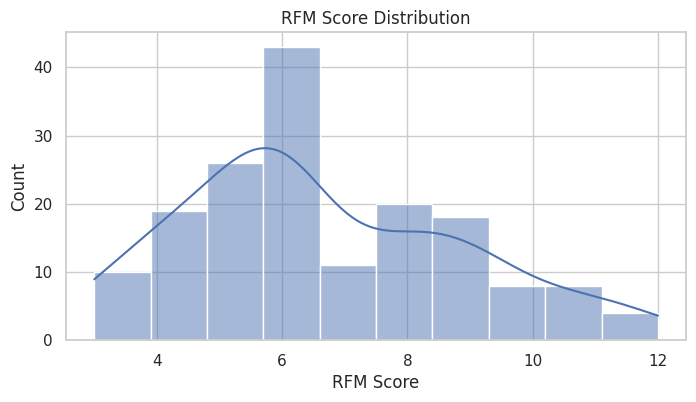

In [ ]:
print(rfm_data['RFM_Score'].value_counts().sort_index(), '\n')
print(rfm_data['customer_segment'].value_counts().sort_index(), '\n')

# 可視化 RFM 分數分佈
plt.figure(figsize=(8,4))
sns.histplot(rfm_data['RFM_Score'], bins=10, kde=True)
plt.title('RFM Score Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.show()

In [ ]:
rfm_data.groupby('customer_segment')[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].mean().round(2)

,Recency,Frequency,Monetary,RFM_Score
customer_segment,,,,
Bronze,189.05,1.00,2436.36,4.29
Silver,103.81,1.00,7777.44,6.00
Gold,57.06,1.03,24183.87,7.65
Platinum,60.08,1.87,17957.89,9.95


**觀察**

1. **高價值顧客**：
   - **Platinum** 和 **Gold** 群體的 RFM 得分最高，表現出高價值顧客的特徵：
     - **Platinum** 群體最近一次購買距今較短（60天），購買頻率最高（1.87次），且購買金額較高（17,957.89元），顯示出這些顧客具有較高的忠誠度和價值
     - **Gold** 群體購買金額最高（24,183.87元），顯示出這些顧客在單次購買時消費較高

2. **潛在增值顧客**：
   - **Silver** 群體的 RFM 得分中等（6.00），這些顧客最近一次購買距今中等（103天），購買頻率最低（1次），購買金額中等（7,777.44元），說明這些顧客具有增值潛力，可以通過針對性營銷策略提升他們的購買頻率

3. **可能流失的顧客**：
   - **Bronze** 群體的 RFM 得分最低（4.29），這些顧客最近一次購買距今較長（189天），購買頻率最低（1次），購買金額也較低（2,436.36元），說明這些顧客可能處於流失邊緣，需要特別關注

**總結與建議**

1. **針對高價值顧客（Platinum 和 Gold）**：
   - 提供專屬優惠、VIP活動、提前試用新產品等增值服務，保持他們的高參與度和忠誠度
   - 個性化推薦高價值產品，提升客單價

2. **提升潛在增值顧客（Silver）**：
   - 通過積分獎勵計劃、推薦有獎等方式鼓勵他們增加購買頻率
   - 發送個性化促銷郵件或推播通知，介紹他們可能感興趣的新產品和優惠

3. **挽回低價值顧客（Bronze）**：
   - 寄送特別優惠券或限時折扣，重新激活這些顧客的購買行為
   - 發送回訪問卷，了解他們不活躍的原因，並根據反饋進行改進

## 7.特徵工程

在上面**用戶行為路徑**章節，我們發現無論用戶最終是否購買產品，有多種路徑涉及使用者將產品加入購物車「**add_to_cart**」，說明該動作是消費前很常見的用戶行為，因此我們決定為潛在加入購物車但沒完成購買的用戶提供限時折扣，進行**有針對性的促銷**，提升購買誘因，以降低上述提到缺乏立即購買的緊迫性或是其他原因而未購買的情形。

我們將根據上述情境建立預測模型。假如偵測到顧客已經走到「**add_to_cart**」，則預測客戶會完成購買的機率，當機率值小於我們設定的閾值，則會提供該用戶限時折扣，提升他完成購買的可能性。範例如下圖：

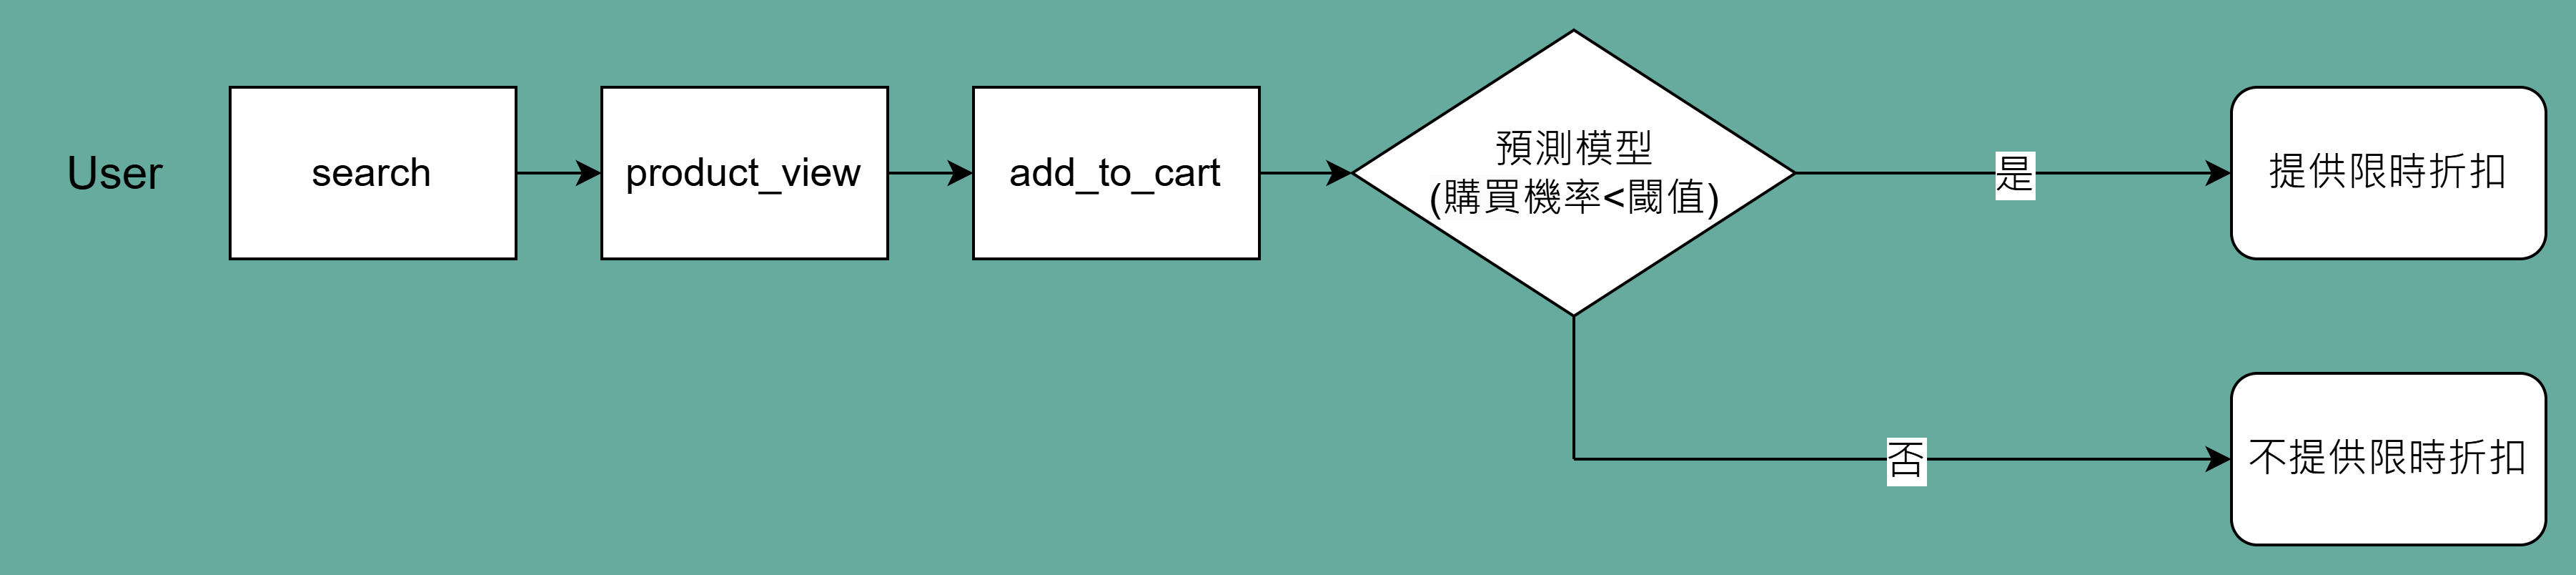<br>
Image designed using <a href="https://app.diagrams.net/">draw.io</a>

因此，為提升模型預測能力，我們將基於用戶層面及產品層面，利用現有欄位創建更多特徵，後續一併用於模型訓練。

**建立新特徵：**
* [基於用戶]()
  * 活躍天數
  * 平均購買間隔時間
  * (加入購物車 vs 購買) 比率
  * (查看願望清單 vs 購買) 比率
  * (加入願望清單 vs 購買) 比率
  * **用戶最近一次加入購物車前的行為路徑**
* [基於產品 Category/SubCategory]()
  * (加入購物車 vs 購買) 比率 - 基於 Category
  * (加入購物車 vs 購買) 比率 - 基於 SubCategory
  * (查看願望清單 vs 購買) 比率 - 基於 Category
  * (查看願望清單 vs 購買) 比率 - 基於 SubCategory
  * (加入願望清單 vs 購買) 比率 - 基於 Category
  * (加入願望清單 vs 購買) 比率 - 基於 SubCategory
  * (產品瀏覽 vs 購買) 比率 - 基於 Category
  * (產品瀏覽 vs 購買) 比率 - 基於 SubCategory

In [ ]:
# 將原本的客戶資料與建立的 RFM 特徵資料進行合併
customer_with_rfm = pd.merge(customer_df, rfm_data, how='left', on='User_id')
print(customer_with_rfm.shape)
customer_with_rfm.head(3)

(2090, 22)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Date,Month,DayOfWeek,Hour,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Group,RFM_Score,customer_segment
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speaker,first_app_open,NaN,NaN,NaN,2019-01-10,1,Thu,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speaker,search,NaN,NaN,NaN,2019-01-10,1,Thu,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jean,search,NaN,NaN,NaN,2019-01-10,1,Thu,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customer_with_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_id           2090 non-null   int64         
 1   Session_id        2090 non-null   object        
 2   DateTime          2090 non-null   datetime64[ns]
 3   Category          2090 non-null   object        
 4   SubCategory       2090 non-null   object        
 5   Action            2090 non-null   object        
 6   Quantity          201 non-null    float64       
 7   Rate              201 non-null    float64       
 8   Total Price       201 non-null    float64       
 9   Date              2090 non-null   object        
 10  Month             2090 non-null   int32         
 11  DayOfWeek         2090 non-null   object        
 12  Hour              2090 non-null   int32         
 13  Recency           1303 non-null   float64       
 14  Frequency         1303 n

In [ ]:
customer_with_rfm['Action'].unique()

array(['first_app_open', 'search', 'product_view', 'read_review',
       'add_review', 'add_to_cart', 'checkout', 'purchase',
       'add_to_wishlist', 'click_wishlist_page', 'product_review'],
      dtype=object)

### 7-1 建立特徵（基於用戶）

In [ ]:
# 活躍天數
user_activity = customer_with_rfm.groupby('User_id')['Date'].nunique().reset_index()
user_activity.rename(columns={'Date': 'num_of_active_days'}, inplace=True)
print(user_activity.shape)
user_activity.head(3)

(401, 2)


,User_id,num_of_active_days
0,51443820326,1
1,51448162784,3
2,51455512201,3


In [ ]:
# 平均購買間隔時間
print(purchase_with_days_diff.shape)
purchase_with_days_diff.head(3)

(32, 3)


,User_id,DateTime,avg_days_between_purchase
0,51448162784,"[2019-06-11 13:23:00, 2019-12-12 19:22:00]",184.0
1,51462598385,"[2019-10-20 17:30:00, 2019-12-15 19:03:00]",56.0
2,51463622150,"[2019-10-14 21:44:00, 2019-11-12 21:27:00]",28.0


In [ ]:
def action_to_purchase(df, group_level, action, denomint_col, action_fixed='purchase', numert_col='purchase_count', numert_to_denomint='cart_to_purchase_rate'):
  """
  計算 action 對 purchase 的比例
  """
  # 計數 action 次數
  action = df[df['Action'] == action].groupby(group_level).size().reset_index()
  action.rename(columns={0: denomint_col}, inplace=True)

  # 計數 purchase 次數
  purchase = df[df['Action'] == action_fixed].groupby(group_level).size().reset_index()
  purchase.rename(columns={0: numert_col}, inplace=True)

  # 合併資料，並計算 action 對 purchase 的比例
  act_to_pur = action.merge(purchase, how='left', on=group_level)
  act_to_pur.fillna(0, inplace=True)
  act_to_pur[numert_to_denomint] = act_to_pur[numert_col]/act_to_pur[denomint_col]
  return act_to_pur

In [ ]:
# (加入購物車 vs 購買) 比率
user_cart_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='User_id', action='add_to_cart', denomint_col='add_to_cart_count', numert_to_denomint='user_cart_to_purchase_rate')
print(user_cart_to_purchase.shape)
user_cart_to_purchase.head(3)

(240, 4)


,User_id,add_to_cart_count,purchase_count,user_cart_to_purchase_rate
0,51448162784,2,2.0,1.0
1,51455512201,1,1.0,1.0
2,51462598385,2,2.0,1.0


In [ ]:
# (查看願望清單 vs 購買) 比率
user_click_wishlist_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='User_id', action='click_wishlist_page', denomint_col='click_wishlist_page_count', numert_to_denomint='user_click_wishlist_to_purchase_rate')
print(user_click_wishlist_to_purchase.shape)
user_click_wishlist_to_purchase.head(3)

(191, 4)


,User_id,click_wishlist_page_count,purchase_count,user_click_wishlist_to_purchase_rate
0,51448162784,1,2.0,2.0
1,51463622150,1,2.0,2.0
2,51465529647,1,2.0,2.0


In [ ]:
# (加入願望清單 vs 購買) 比率
user_add_wishlist_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='User_id', action='add_to_wishlist', denomint_col='add_to_wishlist_count', numert_to_denomint='user_add_wishlist_to_purchase_rate')
print(user_add_wishlist_to_purchase.shape)
user_add_wishlist_to_purchase.head(3)

(26, 4)


,User_id,add_to_wishlist_count,purchase_count,user_add_wishlist_to_purchase_rate
0,51463622150,1,2.0,2.0
1,51477448981,2,1.0,0.5
2,51517997197,2,2.0,1.0


下面將找出用戶最近一次加入購物車前的行為路徑

In [ ]:
# 先刪除變數 temp，釋放其先前佔用的記憶體，為創建新的副本騰出空間
del temp
temp = customer_with_rfm.copy()

In [ ]:
# 將用戶行為合成完整路徑，並篩選出曾有 'add_to_cart' 行為的用戶
temp = temp.sort_values(by=['User_id', 'DateTime']).groupby('User_id')['Action'].apply(lambda x: list(x)).to_frame().reset_index()
temp.rename(columns={'Action': 'path'}, inplace=True)
path_with_add_to_cart = temp[temp['path'].apply(lambda x: 'add_to_cart' in x)]

In [ ]:
def limited_num_of_action(x):
  """
  先找出最後一個 'add_to_cart' 的位置，再往前抓 3 個
  """
  last_add_to_cart_index = len(x)-1-x[::-1].index('add_to_cart')
  if last_add_to_cart_index>=3:
    return last_add_to_cart_index - 3
  else:
    return 0

def index_last_add_to_cart(x):
  """
  找出最後一個 'add_to_cart' 的位置
  """
  last_add_to_cart_index = len(x)-1-x[::-1].index('add_to_cart')
  return last_add_to_cart_index

In [ ]:
# 根據用戶最近一次 'add_to_cart'，拆解出前後的行為
path_with_add_to_cart.loc[:, 'path_with_limit'] = path_with_add_to_cart['path'].apply(lambda x: x[limited_num_of_action(x):])
path_with_add_to_cart.loc[:, 'path_with_limit_before_add_to_cart'] = path_with_add_to_cart['path_with_limit'].apply(lambda x: x[:index_last_add_to_cart(x)+1])
path_with_add_to_cart.loc[:, 'path_with_limit_after_add_to_cart'] = path_with_add_to_cart['path_with_limit'].apply(lambda x: x[index_last_add_to_cart(x)+1:])
print(path_with_add_to_cart.shape)
path_with_add_to_cart.head(3)

(240, 5)


,User_id,path,path_with_limit,path_with_limit_before_add_to_cart,path_with_limit_after_add_to_cart
1,51448162784,"[first_app_open, search, product_view, read_review, add_to_cart, search, read_review, add_to_cart, click_wishlist_page, checkout, purchase, checkout, purchase]","[add_to_cart, search, read_review, add_to_cart, click_wishlist_page, checkout, purchase, checkout, purchase]","[add_to_cart, search, read_review, add_to_cart]","[click_wishlist_page, checkout, purchase, checkout, purchase]"
2,51455512201,"[first_app_open, search, product_view, read_review, search, product_view, read_review, add_to_cart, checkout, purchase]","[search, product_view, read_review, add_to_cart, checkout, purchase]","[search, product_view, read_review, add_to_cart]","[checkout, purchase]"
3,51462598385,"[search, product_view, read_review, add_to_cart, search, product_view, add_to_cart, search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]","[add_to_cart, search, product_view, add_to_cart, search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]","[add_to_cart, search, product_view, add_to_cart]","[search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]"


In [ ]:
# 計數用戶路徑
path_with_add_to_cart['path_with_limit_before_add_to_cart'].value_counts()

path_with_limit_before_add_to_cart
[product_view, read_review, click_wishlist_page, add_to_cart]        29
[read_review, click_wishlist_page, add_to_cart]                      26
[add_to_cart]                                                        24
[click_wishlist_page, add_to_cart]                                   24
[search, product_view, read_review, add_to_cart]                     21
[read_review, add_to_cart]                                           11
[read_review, product_view, click_wishlist_page, add_to_cart]        10
[product_view, read_review, add_to_cart]                              9
[search, read_review, click_wishlist_page, add_to_cart]               9
[search, product_view, click_wishlist_page, add_to_cart]              6
[product_view, click_wishlist_page, add_to_cart]                      6
[search, read_review, add_to_cart]                                    4
[search, product_view, add_to_cart]                                   4
[product_view, add_to_cart]  

In [ ]:
# 將前 10 名路徑各自成一祖，其餘路徑合併為 1 組 (共 11 組)
top_10_paths = path_with_add_to_cart['path_with_limit_before_add_to_cart'].value_counts().iloc[:10].index.tolist()
path_with_add_to_cart.loc[:, 'group_final_path'] = path_with_add_to_cart['path_with_limit_before_add_to_cart'].apply(lambda x: ['others'] if x not in top_10_paths else x)
print(path_with_add_to_cart.shape)
path_with_add_to_cart.head(3)

(240, 6)


,User_id,path,path_with_limit,path_with_limit_before_add_to_cart,path_with_limit_after_add_to_cart,group_final_path
1,51448162784,"[first_app_open, search, product_view, read_review, add_to_cart, search, read_review, add_to_cart, click_wishlist_page, checkout, purchase, checkout, purchase]","[add_to_cart, search, read_review, add_to_cart, click_wishlist_page, checkout, purchase, checkout, purchase]","[add_to_cart, search, read_review, add_to_cart]","[click_wishlist_page, checkout, purchase, checkout, purchase]",[others]
2,51455512201,"[first_app_open, search, product_view, read_review, search, product_view, read_review, add_to_cart, checkout, purchase]","[search, product_view, read_review, add_to_cart, checkout, purchase]","[search, product_view, read_review, add_to_cart]","[checkout, purchase]","[search, product_view, read_review, add_to_cart]"
3,51462598385,"[search, product_view, read_review, add_to_cart, search, product_view, add_to_cart, search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]","[add_to_cart, search, product_view, add_to_cart, search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]","[add_to_cart, search, product_view, add_to_cart]","[search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]",[others]


In [ ]:
# 計數用戶路徑 (分組後)
path_with_add_to_cart['group_final_path'].value_counts()

group_final_path
[others]                                                         71
[product_view, read_review, click_wishlist_page, add_to_cart]    29
[read_review, click_wishlist_page, add_to_cart]                  26
[click_wishlist_page, add_to_cart]                               24
[add_to_cart]                                                    24
[search, product_view, read_review, add_to_cart]                 21
[read_review, add_to_cart]                                       11
[read_review, product_view, click_wishlist_page, add_to_cart]    10
[product_view, read_review, add_to_cart]                          9
[search, read_review, click_wishlist_page, add_to_cart]           9
[search, product_view, click_wishlist_page, add_to_cart]          6
Name: count, dtype: int64

In [ ]:
# 建立標籤(Target) - 用戶是否購買
path_with_add_to_cart.loc[:, 'Target'] = path_with_add_to_cart['path_with_limit_after_add_to_cart'].apply(lambda x: 1 if 'purchase' in x else 0)
print(path_with_add_to_cart.shape)
path_with_add_to_cart.head(3)

(240, 7)


,User_id,path,path_with_limit,path_with_limit_before_add_to_cart,path_with_limit_after_add_to_cart,group_final_path,Target
1,51448162784,"[first_app_open, search, product_view, read_review, add_to_cart, search, read_review, add_to_cart, click_wishlist_page, checkout, purchase, checkout, purchase]","[add_to_cart, search, read_review, add_to_cart, click_wishlist_page, checkout, purchase, checkout, purchase]","[add_to_cart, search, read_review, add_to_cart]","[click_wishlist_page, checkout, purchase, checkout, purchase]",[others],1
2,51455512201,"[first_app_open, search, product_view, read_review, search, product_view, read_review, add_to_cart, checkout, purchase]","[search, product_view, read_review, add_to_cart, checkout, purchase]","[search, product_view, read_review, add_to_cart]","[checkout, purchase]","[search, product_view, read_review, add_to_cart]",1
3,51462598385,"[search, product_view, read_review, add_to_cart, search, product_view, add_to_cart, search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]","[add_to_cart, search, product_view, add_to_cart, search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]","[add_to_cart, search, product_view, add_to_cart]","[search, checkout, purchase, product_view, search, product_view, checkout, purchase, add_review]",[others],1


In [ ]:
# 強制進行垃圾回收，清理&釋放記憶體
gc.collect()

### 7-2 建立特徵（基於產品 類別/子類別）

In [ ]:
# (加入購物車 vs 購買) 比率 - 基於 Category
catg_cart_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='Category', action='add_to_cart', denomint_col='add_to_cart_count', numert_to_denomint='catg_cart_to_purchase_rate')
print(catg_cart_to_purchase.shape)
display(catg_cart_to_purchase.head(3))

# (加入購物車 vs 購買) 比率 - 基於 SubCategory
subcatg_cart_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='SubCategory', action='add_to_cart', denomint_col='add_to_cart_count', numert_to_denomint='subcatg_cart_to_purchase_rate')
print('\n', subcatg_cart_to_purchase.shape)
subcatg_cart_to_purchase.head(3)

(88, 4)


,Category,add_to_cart_count,purchase_count,catg_cart_to_purchase_rate
0,Accessory,15,12.0,0.8
1,Air Conditioner,1,2.0,2.0
2,Appliance,1,1.0,1.0



 (232, 4)


,SubCategory,add_to_cart_count,purchase_count,subcatg_cart_to_purchase_rate
0,Air Cooler,1,1.0,1.0
1,Air Tight Container,1,0.0,0.0
2,Amazon Alexa,1,0.0,0.0


In [ ]:
# (查看願望清單 vs 購買) 比率 - 基於 Category
catg_click_wishlist_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='Category', action='click_wishlist_page', denomint_col='click_wishlist_page_count', numert_to_denomint='catg_click_wishlist_to_purchase_rate')
print(catg_click_wishlist_to_purchase.shape)
display(catg_click_wishlist_to_purchase.head(3))

# (查看願望清單 vs 購買) 比率 - 基於 SubCategory
subcatg_click_wishlist_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='SubCategory', action='click_wishlist_page', denomint_col='click_wishlist_page_count', numert_to_denomint='subcatg_click_wishlist_to_purchase_rate')
print('\n', subcatg_click_wishlist_to_purchase.shape)
subcatg_click_wishlist_to_purchase.head(3)

(72, 4)


,Category,click_wishlist_page_count,purchase_count,catg_click_wishlist_to_purchase_rate
0,Accessory,14,12.0,0.857143
1,Appliance,3,1.0,0.333333
2,Artwork,1,0.0,0.000000



 (174, 4)


,SubCategory,click_wishlist_page_count,purchase_count,subcatg_click_wishlist_to_purchase_rate
0,Air Cooler,1,1.0,1.0
1,Air Tight Container,1,0.0,0.0
2,Amazon Alexa,1,0.0,0.0


In [ ]:
# (加入願望清單 vs 購買) 比率 - 基於 Category
catg_add_wishlist_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='Category', action='add_to_wishlist', denomint_col='add_to_wishlist_count', numert_to_denomint='catg_add_wishlist_to_purchase_rate')
print(catg_add_wishlist_to_purchase.shape)
display(catg_add_wishlist_to_purchase.head(3))

# (加入願望清單 vs 購買) 比率 - 基於 SubCategory
subcatg_add_wishlist_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='SubCategory', action='add_to_wishlist', denomint_col='add_to_wishlist_count', numert_to_denomint='subcatg_add_wishlist_to_purchase_rate')
print('\n', subcatg_add_wishlist_to_purchase.shape)
subcatg_add_wishlist_to_purchase.head(3)

(18, 4)


,Category,add_to_wishlist_count,purchase_count,catg_add_wishlist_to_purchase_rate
0,Accessory,3,12,4.0
1,Baby Care,1,1,1.0
2,Bed Room,1,5,5.0



 (26, 4)


,SubCategory,add_to_wishlist_count,purchase_count,subcatg_add_wishlist_to_purchase_rate
0,Book,2,4,2.0
1,Bp Monitor,1,1,1.0
2,Bumper,1,1,1.0


In [ ]:
# (產品瀏覽 vs 購買) 比率 - 基於 Category
catg_product_view_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='Category', action='product_view', denomint_col='product_view_count', numert_to_denomint='catg_product_view_to_purchase_rate')
print(catg_product_view_to_purchase.shape)
display(catg_product_view_to_purchase.head(3))

# (產品瀏覽 vs 購買) 比率 - 基於 SubCategory
subcatg_product_view_to_purchase = action_to_purchase(df=customer_with_rfm, group_level='SubCategory', action='product_view', denomint_col='product_view_count', numert_to_denomint='subcatg_product_view_to_purchase_rate')
print('\n', subcatg_product_view_to_purchase.shape)
subcatg_product_view_to_purchase.head(3)

(89, 4)


,Category,product_view_count,purchase_count,catg_product_view_to_purchase_rate
0,Accessory,9,12.0,1.333333
1,Air Conditioner,7,2.0,0.285714
2,Artwork,1,0.0,0.000000



 (211, 4)


,SubCategory,product_view_count,purchase_count,subcatg_product_view_to_purchase_rate
0,Amazon Alexa,1,0.0,0.000000
1,Arm Sleeve,1,0.0,0.000000
2,Aux Cable,3,1.0,0.333333


In [ ]:
# 強制進行垃圾回收，清理&釋放記憶體
gc.collect()

### 7-3 準備資料供預測模型使用

以下我們將整併上述資料，並選取將用於預測模型的特徵，接著依序進行：**缺失值插補**，**類別型資料轉換為數值型資料**，**特徵縮放**。

#### 資料選擇及整併

In [ ]:
print(customer_with_rfm.shape)
customer_with_rfm.head(3)

(2090, 22)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Date,Month,DayOfWeek,Hour,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Group,RFM_Score,customer_segment
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speaker,first_app_open,NaN,NaN,NaN,2019-01-10,1,Thu,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speaker,search,NaN,NaN,NaN,2019-01-10,1,Thu,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jean,search,NaN,NaN,NaN,2019-01-10,1,Thu,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 找出每位用戶最近一次加入購物車的資料
user_latest_add_to_cart = customer_with_rfm[customer_with_rfm['Action']=='add_to_cart'].sort_values(by=['User_id', 'DateTime']).groupby('User_id').tail(1)
print(user_latest_add_to_cart.shape)
user_latest_add_to_cart.head(3)

(240, 22)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Date,Month,DayOfWeek,Hour,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Group,RFM_Score,customer_segment
746,51448162784,dxyhgfdf-5a6d-4aaa-a7ce,2019-06-11 13:13:00,Camera Accessory,Camera Bag,add_to_cart,NaN,NaN,NaN,2019-06-11,6,Tue,13,11.0,2.0,21500.0,4.0,4.0,4.0,444,12.0,Platinum
176,51455512201,8c3835-2196-4022-926c-7f,2019-10-14 10:28:00,Men's Fashion,Shoe,add_to_cart,NaN,NaN,NaN,2019-10-14,10,Mon,10,65.0,1.0,10000.0,3.0,1.0,3.0,313,7.0,Gold
433,51462598385,8384ed-c7f7-442e-8ae9-713,2019-10-20 17:22:00,Mobile & Accessory,Aux Cable,add_to_cart,NaN,NaN,NaN,2019-10-20,10,Sun,17,8.0,2.0,550.0,4.0,4.0,1.0,441,9.0,Platinum


In [ ]:
# 選取所需欄位資料並建立副本 (RFM 可嘗試替換欄位成 'Recency', 'Frequency', 'Monetary')
df_base = user_latest_add_to_cart[['User_id', 'Category', 'SubCategory', 'R_rank', 'F_rank', 'M_rank']].copy()
print(df_base.shape)
df_base.head(3)

(240, 6)


,User_id,Category,SubCategory,R_rank,F_rank,M_rank
746,51448162784,Camera Accessory,Camera Bag,4.0,4.0,4.0
176,51455512201,Men's Fashion,Shoe,3.0,1.0,3.0
433,51462598385,Mobile & Accessory,Aux Cable,4.0,4.0,1.0


In [ ]:
### 合併上述建立的特徵資料 ###

# 活躍天數
df_base = df_base.merge(user_activity, on='User_id', how='left')

# 平均購買間隔時間
df_base = df_base.merge(purchase_with_days_diff[['User_id','avg_days_between_purchase']], on='User_id', how='left')

# (加入購物車 vs 購買) 比率
df_base = df_base.merge(user_cart_to_purchase[['User_id','user_cart_to_purchase_rate']], on='User_id', how='left')

# (查看願望清單 vs 購買) 比率
df_base = df_base.merge(user_click_wishlist_to_purchase[['User_id','user_click_wishlist_to_purchase_rate']], on='User_id', how='left')

# (加入願望清單 vs 購買) 比率
df_base = df_base.merge(user_add_wishlist_to_purchase[['User_id','user_add_wishlist_to_purchase_rate']], on='User_id', how='left')

# (加入購物車 vs 購買) 比率 - 基於 Category
df_base = df_base.merge(catg_cart_to_purchase[['Category','catg_cart_to_purchase_rate']], on='Category', how='left')

# (加入購物車 vs 購買) 比率 - 基於 SubCategory
df_base = df_base.merge(subcatg_cart_to_purchase[['SubCategory','subcatg_cart_to_purchase_rate']], on='SubCategory', how='left')

# (查看願望清單 vs 購買) 比率 - 基於 Category
df_base = df_base.merge(catg_click_wishlist_to_purchase[['Category','catg_click_wishlist_to_purchase_rate']], on='Category', how='left')

# (查看願望清單 vs 購買) 比率 - 基於 SubCategory
df_base = df_base.merge(subcatg_click_wishlist_to_purchase[['SubCategory','subcatg_click_wishlist_to_purchase_rate']], on='SubCategory', how='left')

# (加入願望清單 vs 購買) 比率 - 基於 Category
df_base = df_base.merge(catg_add_wishlist_to_purchase[['Category','catg_add_wishlist_to_purchase_rate']], on='Category', how='left')

# (加入願望清單 vs 購買) 比率 - 基於 SubCategory
df_base = df_base.merge(subcatg_add_wishlist_to_purchase[['SubCategory','subcatg_add_wishlist_to_purchase_rate']], on='SubCategory', how='left')

# (產品瀏覽 vs 購買) 比率 - 基於 Category
df_base = df_base.merge(catg_product_view_to_purchase[['Category','catg_product_view_to_purchase_rate']], on='Category', how='left')

# (產品瀏覽 vs 購買) 比率 - 基於 SubCategory
df_base = df_base.merge(subcatg_product_view_to_purchase[['SubCategory','subcatg_product_view_to_purchase_rate']], on='SubCategory', how='left')

# 用戶路徑分組 & 標籤(Y)
df_base = df_base.merge(path_with_add_to_cart[['User_id', 'group_final_path', 'Target']], on='User_id', how='left')

In [ ]:
print(df_base.shape)
df_base.head(3)

(240, 21)


,User_id,Category,SubCategory,R_rank,F_rank,M_rank,num_of_active_days,avg_days_between_purchase,user_cart_to_purchase_rate,user_click_wishlist_to_purchase_rate,user_add_wishlist_to_purchase_rate,catg_cart_to_purchase_rate,subcatg_cart_to_purchase_rate,catg_click_wishlist_to_purchase_rate,subcatg_click_wishlist_to_purchase_rate,catg_add_wishlist_to_purchase_rate,subcatg_add_wishlist_to_purchase_rate,catg_product_view_to_purchase_rate,subcatg_product_view_to_purchase_rate,group_final_path,Target
0,51448162784,Camera Accessory,Camera Bag,4.0,4.0,4.0,3,184.0,1.0,2.0,NaN,0.300000,1.0,0.30,1.0,NaN,NaN,0.600000,NaN,[others],1
1,51455512201,Men's Fashion,Shoe,3.0,1.0,3.0,3,NaN,1.0,NaN,NaN,0.800000,1.0,2.00,1.0,8.000000,NaN,0.615385,0.500000,"[search, product_view, read_review, add_to_cart]",1
2,51462598385,Mobile & Accessory,Aux Cable,4.0,4.0,1.0,5,56.0,1.0,NaN,NaN,0.933333,1.0,1.75,NaN,2.333333,NaN,0.538462,0.333333,[others],1


#### 缺失值插補

In [ ]:
df_base.isna().sum()

User_id                                      0
Category                                     0
SubCategory                                  0
R_rank                                      93
F_rank                                      93
M_rank                                      93
num_of_active_days                           0
avg_days_between_purchase                  208
user_cart_to_purchase_rate                   0
user_click_wishlist_to_purchase_rate        99
user_add_wishlist_to_purchase_rate         217
catg_cart_to_purchase_rate                   0
subcatg_cart_to_purchase_rate                0
catg_click_wishlist_to_purchase_rate        25
subcatg_click_wishlist_to_purchase_rate     94
catg_add_wishlist_to_purchase_rate         139
subcatg_add_wishlist_to_purchase_rate      206
catg_product_view_to_purchase_rate          15
subcatg_product_view_to_purchase_rate      103
group_final_path                             0
Target                                       0
dtype: int64

根據上述缺失值，差補方式如下：
* `R_rank`，`F_rank`，`M_rank`：數值若為缺失，代表該用戶目前沒購買過，因此打算將缺失值填補為 0
* `avg_days_between_purchase`：此為用戶消費的時間間隔平均天數，該數值若為缺失，代表該用戶目前消費次數為 0 次或 1 次，因此打算將缺失值填補為 -1
* 其餘特徵為用戶特定行為次數相對購買次數的計算比率，該數值若為缺失，代表該用戶不曾發生該特定行為，因此打算將缺失值填補為 -1

In [ ]:
# 'R_rank', 'F_rank', 'M_rank' -> 填補 0
df_base[['R_rank', 'F_rank', 'M_rank']] = df_base[['R_rank', 'F_rank', 'M_rank']].fillna(0)

In [ ]:
# 'avg_days_between_purchase' 及其他特徵 -> 填補 -1
df_base['avg_days_between_purchase'] = df_base['avg_days_between_purchase'].fillna(-1)
df_base = df_base.fillna(-1)

In [ ]:
df_base.isna().sum().sum()

0

#### 類別轉數值

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   User_id                                  240 non-null    int64  
 1   Category                                 240 non-null    object 
 2   SubCategory                              240 non-null    object 
 3   R_rank                                   240 non-null    float64
 4   F_rank                                   240 non-null    float64
 5   M_rank                                   240 non-null    float64
 6   num_of_active_days                       240 non-null    int64  
 7   avg_days_between_purchase                240 non-null    float64
 8   user_cart_to_purchase_rate               240 non-null    float64
 9   user_click_wishlist_to_purchase_rate     240 non-null    float64
 10  user_add_wishlist_to_purchase_rate       240 non-n

In [ ]:
# 篩選出資料型態為 object 的欄位
obj_cols = df_base.select_dtypes(include=['object']).columns.tolist()
print(f"資料型態為 object 的欄位: {obj_cols}")

資料型態為 object 的欄位: ['Category', 'SubCategory', 'group_final_path']


欄位資料轉換方式如下：
* `group_final_path`：採用 **OneHotEncoder** 進行轉換
* `Category`, `SubCategory`：不用於模型訓練
* 此外，數值型資料中，`User_id` 亦不用於模型訓練

```
OneHotEncoder 編碼範例

   城市          城市_台北市  城市_桃園市  城市_新竹市
0  台北市            1.0      0.0      0.0
1  桃園市            0.0      1.0      0.0
2  桃園市    --->      0.0      1.0      0.0
3  台北市            1.0      0.0      0.0
4  新竹市            0.0      0.0      1.0

```

將 `group_final_path` 轉為數值資料

In [ ]:
# 將 pd.Series 轉換為 2D array
np_array = np.array(df_base['group_final_path'].apply(str))
np_array = np_array.reshape(-1, 1)

# 執行編碼
onehot_enc = OneHotEncoder(handle_unknown='ignore')
onehot_enc_array = onehot_enc.fit_transform(np_array).toarray()

# 原始欄位名稱
original_feature_names = ['group_final_path']

# 類別欄位的分類值
categories = onehot_enc.categories_

# 生成新的欄位名稱
new_feature_names = []
for feature_name, category in zip(original_feature_names, categories):
  new_feature_names.extend([f"{feature_name}_{cat}" for cat in category])

# 將編碼結果轉換為 DataFrame 並設置新生成的欄位名稱
onehot_enc_df = pd.DataFrame(onehot_enc_array, columns=new_feature_names)
print(onehot_enc_df.shape)
onehot_enc_df.head(3)

(240, 11)


,group_final_path_['add_to_cart'],"group_final_path_['click_wishlist_page', 'add_to_cart']",group_final_path_['others'],"group_final_path_['product_view', 'read_review', 'add_to_cart']","group_final_path_['product_view', 'read_review', 'click_wishlist_page', 'add_to_cart']","group_final_path_['read_review', 'add_to_cart']","group_final_path_['read_review', 'click_wishlist_page', 'add_to_cart']","group_final_path_['read_review', 'product_view', 'click_wishlist_page', 'add_to_cart']","group_final_path_['search', 'product_view', 'click_wishlist_page', 'add_to_cart']","group_final_path_['search', 'product_view', 'read_review', 'add_to_cart']","group_final_path_['search', 'read_review', 'click_wishlist_page', 'add_to_cart']"
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


排除 `User_id`，`Category`，`SubCategory`，不用於模型訓練，之後將以上轉換後的欄位進行合併

In [ ]:
df_model = df_base.drop(['User_id', 'Category', 'SubCategory', 'group_final_path'], axis=1)
df_model = pd.concat([df_model, onehot_enc_df], axis=1)
print(df_model.shape)
df_model.head(3)

(240, 28)


,R_rank,F_rank,M_rank,num_of_active_days,avg_days_between_purchase,user_cart_to_purchase_rate,user_click_wishlist_to_purchase_rate,user_add_wishlist_to_purchase_rate,catg_cart_to_purchase_rate,subcatg_cart_to_purchase_rate,catg_click_wishlist_to_purchase_rate,subcatg_click_wishlist_to_purchase_rate,catg_add_wishlist_to_purchase_rate,subcatg_add_wishlist_to_purchase_rate,catg_product_view_to_purchase_rate,subcatg_product_view_to_purchase_rate,Target,group_final_path_['add_to_cart'],"group_final_path_['click_wishlist_page', 'add_to_cart']",group_final_path_['others'],"group_final_path_['product_view', 'read_review', 'add_to_cart']","group_final_path_['product_view', 'read_review', 'click_wishlist_page', 'add_to_cart']","group_final_path_['read_review', 'add_to_cart']","group_final_path_['read_review', 'click_wishlist_page', 'add_to_cart']","group_final_path_['read_review', 'product_view', 'click_wishlist_page', 'add_to_cart']","group_final_path_['search', 'product_view', 'click_wishlist_page', 'add_to_cart']","group_final_path_['search', 'product_view', 'read_review', 'add_to_cart']","group_final_path_['search', 'read_review', 'click_wishlist_page', 'add_to_cart']"
0,4.0,4.0,4.0,3,184.0,1.0,2.0,-1.0,0.300000,1.0,0.30,1.0,-1.000000,-1.0,0.600000,-1.000000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,3.0,3,-1.0,1.0,-1.0,-1.0,0.800000,1.0,2.00,1.0,8.000000,-1.0,0.615385,0.500000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,4.0,1.0,5,56.0,1.0,-1.0,-1.0,0.933333,1.0,1.75,-1.0,2.333333,-1.0,0.538462,0.333333,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 特徵縮放

In [ ]:
# 先刪除變數 temp，釋放其先前佔用的記憶體
del temp

# 標籤(Target)不做特徵縮放
temp = df_model.drop(['Target'], axis=1)

In [ ]:
# 執行特徵縮放
scaler = MinMaxScaler()
scaler_array = scaler.fit_transform(temp)

# 合併特徵縮放後的欄位及標籤(Target)欄位
scaler_df = pd.DataFrame(scaler_array, columns=temp.columns)
df_model_scaled = pd.concat([scaler_df, df_model['Target']], axis=1)
print(df_model_scaled.shape)
df_model_scaled.head(3)

(240, 28)


,R_rank,F_rank,M_rank,num_of_active_days,avg_days_between_purchase,user_cart_to_purchase_rate,user_click_wishlist_to_purchase_rate,user_add_wishlist_to_purchase_rate,catg_cart_to_purchase_rate,subcatg_cart_to_purchase_rate,catg_click_wishlist_to_purchase_rate,subcatg_click_wishlist_to_purchase_rate,catg_add_wishlist_to_purchase_rate,subcatg_add_wishlist_to_purchase_rate,catg_product_view_to_purchase_rate,subcatg_product_view_to_purchase_rate,group_final_path_['add_to_cart'],"group_final_path_['click_wishlist_page', 'add_to_cart']",group_final_path_['others'],"group_final_path_['product_view', 'read_review', 'add_to_cart']","group_final_path_['product_view', 'read_review', 'click_wishlist_page', 'add_to_cart']","group_final_path_['read_review', 'add_to_cart']","group_final_path_['read_review', 'click_wishlist_page', 'add_to_cart']","group_final_path_['read_review', 'product_view', 'click_wishlist_page', 'add_to_cart']","group_final_path_['search', 'product_view', 'click_wishlist_page', 'add_to_cart']","group_final_path_['search', 'product_view', 'read_review', 'add_to_cart']","group_final_path_['search', 'read_review', 'click_wishlist_page', 'add_to_cart']",Target
0,1.00,1.00,1.00,0.285714,0.752033,0.333333,1.0,0.0,0.100000,0.5,0.26,0.4,0.000000,0.0,0.400000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.75,0.25,0.75,0.285714,0.000000,0.333333,0.0,0.0,0.266667,0.5,0.60,0.4,0.900000,0.0,0.403846,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,1.00,1.00,0.25,0.571429,0.231707,0.333333,0.0,0.0,0.311111,0.5,0.55,0.0,0.333333,0.0,0.384615,0.444444,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# 強制進行垃圾回收，清理&釋放記憶體
gc.collect()

## 8.模型建立

這裡我們的訓練資料採用：用戶**最近一次**加入購物車購買與否。

以下會先將數據拆分為訓練數據（train）及驗證數據（valid）。我們用訓練數據做訓練，再去預測驗證數據，並觀察模型表現（Accuracy, Recall, Precision, F1, ROC-AUC Score）。

In [ ]:
# 查看預測標籤(Target)的類別數量
print(df_model_scaled['Target'].value_counts())
df_model_scaled['Target'].value_counts(normalize=True)

Target
1    135
0    105
Name: count, dtype: int64


Target
1    0.5625
0    0.4375
Name: proportion, dtype: float64

上述標籤類別數量所代表的涵義如下：
* 1：135 -> add_to_cart & buy
* 0：105 -> add_to_cart & Not buy

In [ ]:
# 將特徵與標籤分開
y = df_model_scaled['Target'].copy()
X = df_model_scaled.drop(['Target'], axis=1)

In [ ]:
# 將數據拆分為訓練數據及驗證數據
# 拆分基於隨機數產生器。將參數 random_state 設定一個數值，確保資料每次都會得到相同的分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

# 查看拆分情形
print((X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape), '\n')

# 查看訓練集的標籤(Target)是否平衡
print(y_train.value_counts())
y_train.value_counts(normalize=True)

((168, 27), (168,)) ((72, 27), (72,)) 

Target
1    94
0    74
Name: count, dtype: int64


Target
1    0.559524
0    0.440476
Name: proportion, dtype: float64

In [ ]:
# 定義模型
logit_clf = LogisticRegression(random_state=0)

# 訓練模型
logit_clf.fit(X_train, y_train)

# 預測
y_valid_preds = cross_val_predict(logit_clf, X_valid, y_valid, cv=3)
print(f"實際標籤(Target):\n{y_valid.to_numpy()}")
print(f"\n預測標籤(Target):\n{y_valid_preds}")

# 模型準確度
print(f"\nAccuracy:{accuracy_score(y_valid, y_valid_preds)}")

# Confusion Matrix
print(f"\nConfusion Matrix:\n{confusion_matrix(y_valid, y_valid_preds)}")

# Recall, Precision, F1
print(f"\nRecall: {recall_score(y_valid, y_valid_preds)}")
print(f"Precision: {precision_score(y_valid, y_valid_preds)}")
print(f"F1: {f1_score(y_valid, y_valid_preds)}\n")

實際標籤(Target):
[0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1]

預測標籤(Target):
[0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1]

Accuracy:0.9583333333333334

Confusion Matrix:
[[28  3]
 [ 0 41]]

Recall: 1.0
Precision: 0.9318181818181818
F1: 0.9647058823529412



In [ ]:
# 預測 標籤(Target) 是 1(buy) 的機率
y_valid_proba = logit_clf.predict_proba(X_valid)[:,1]

# ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_valid_proba)}\n")
pd.concat([y_valid.reset_index(drop=True), pd.DataFrame({"y_pred_prob (Target=1)": y_valid_proba})], axis=1).head()

ROC-AUC Score: 0.9763965381589299



,Target,y_pred_prob (Target=1)
0,0,0.436070
1,1,0.921202
2,1,0.947704
3,0,0.058068
4,0,0.024093


**說明**

當偵測到顧客已經走到「add_to_cart」，則預測客戶會完成購買的機率，當機率值小於我們設定的閾值，則會提供該用戶限時折扣，提升他完成購買的可能性。

決策閾值是模型將預測機率轉換為最終分類結果的門檻。例如，當預測機率大於某個閾值時，將樣本分類為正類別；否則分類為負類別。

以上面的五筆資料為例：
* 當模型預測為 1 的機率較大時，則會給定 Target=1，而預設的閾值為 0.5
* 假如提高閾值的設定，例如設定為 0.7，則當模型預測為 1 的機率達到 0.7 以上時，才會給定 Target=1，即預測客戶會購買，否則為 0
* 當模型給定 Target=0 時，即預測客戶不會購買，這時候我們才會提供該用戶限時折扣

**觀察**

* **準確率（Accuracy）**：表示模型的整體預測準確性。在所有的預測中，有 95.83% 是正確的。這是一個很高的準確率，表明模型在大多數情況下能夠正確分類
* **混淆矩陣（Confusion Matrix）**：模型在檢測正類別上非常準確（FN=0），但有少量的誤報（FP=3）
* **召回率（Recall）**：表示在所有實際為正類別的樣本中，模型正確預測為正類別的比例。召回率為 1.0 表明模型能夠檢測出所有的正類別
* **精確率（Precision）**：精確率表示在所有預測為正類別的樣本中，實際為正類別的比例。精確率為 0.9318 表明模型的預測中有 93.18% 是正確的
* **F1 Score**：F1 Score 是精確率和召回率的調和平均數，是綜合考慮精確率和召回率的指標。F1 Score 為 0.9647 表明模型在兼顧精確率和召回率方面有很好的表現
* **ROC-AUC Score**：ROC-AUC Score 表示模型區分正負類別樣本的能力。分數接近 1 表明模型有很強的區分能力，能夠很好地將正類別和負類別分開


**總結與建議**

* **高準確率和 F1 Score**：表明模型在整體預測準確性和精確率、召回率的平衡方面表現優異
* **零漏檢率（Recall = 1.0）**：模型能夠檢測出所有的正類別樣本，這對於許多應用場景（如疾病檢測、欺詐檢測等）是非常重要的，因為漏檢的代價可能非常高
* **少量誤報（FP=3）**：雖然模型在正類別檢測方面表現非常好，但存在少量誤報。這在一些應用場景中可能是可以接受的，但在其他情況下（如誤報成本很高的情況，像是導致無辜的人被誤判而侵犯人權等），可能需要進一步調整模型
* **高區分能力（ROC-AUC = 0.9764）**：模型有很強的區分能力，能夠很好地將正類別和負類別分開。這表明模型在不同的決策閾值下都能保持較高的預測性能
* **持續監控模型性能**：確保模型在不同數據集或未來數據上的穩定性和持續性能，特別是對於實時應用或動態變化的數據
* **考慮應用場景的權衡**：根據具體應用場景，權衡精確率和召回率，確定最適合的模型參數和閾值。例如，在某些情況下，可能需要更高的精確率，而在另一些情況下，可能更重視召回率

## 9.結論與建議

背景源於一家販售各種產品的早期電商公司，為提升產品銷售轉化率，計畫提供折價券以刺激消費。由於折扣活動預算有限，公司希望透過用戶行為分析，決定最佳提供折價券的時機。我們從用戶和產品兩個角度進行分析，並使用經典的RFM模型進行客戶分群，了解不同客戶群體的消費行為，並制定針對性的營銷策略。此外，我們從用戶消費流程中找出適合提供折價券的情境，並建立預測模型，用以預測客戶購買產品的機率。通過這個模型，公司可以識別出潛在放棄消費的用戶，並提供折價券以鼓勵購買，而非將折價券提供給很可能會購買的用戶。最終，我們在不同層面提出決策建議，期望透過預測模型提升銷售轉化率，從而有效利用折扣預算。


各章節之結論與建議如下：

* **用戶行為初探**：
   - **購物過程時間**：大多數用戶購物過程快速高效，但也有少數用戶需要更多時間決策。
   - **購買間隔時間**：購買週期差異大，對於購買間隔長的用戶，可通過促銷和提醒策略促進再購。
   - **購物方式**：
     - **加入購物車**：設置購物車提醒和促銷活動，通過郵件或推播通知提醒用戶完成購買。
     - **直接購買**：優化直接購買流程，提升購物體驗。

* **用戶活躍度**：
   - 用戶活躍度和平均價格存在相關性，潛在促銷活動顯著影響用戶行為。
   - 月度活躍度受促銷活動和節日影響顯著，特別是10月和11月。
   - 週一和下午、晚間是用戶活躍高峰期，適合進行推廣活動。

* **用戶行為路徑**：
   - **最佳化結帳流程**：確保「加入購物車、結帳、購買」流程順暢。
   - **有針對性的促銷**：提供限時折扣和再行銷活動，吸引潛在購買用戶。
   - **首次用戶參與**：提供入門體驗和熱門商品推薦，引導首次購買。
   - **A/B 測試**：優化產品頁面元素和行動呼籲按鈕設計，提高轉化率。

* **價格與購買數量**：
   - **低價產品**：加強推廣活動，提升銷量。
   - **高價產品**：加強品牌宣傳和價值傳遞，提升購買意願。
   - **產品組合銷售**：將不同價格區間的產品組合銷售，提供優惠吸引消費者。

* **辨識熱門商品**：
   - 提升熱門子類別的曝光度和促銷活動。
   - 進行產品組合銷售，提升整體銷量。
   - 收集客戶反饋，改進產品品質，提升用戶滿意度和復購率。

* **客戶分群分析**：
   - **高價值顧客**（Platinum 和 Gold）：提供專屬優惠、VIP活動等，保持高參與度和忠誠度。
   - **潛在增值顧客**（Silver）：通過積分獎勵和個性化促銷提高購買頻率。
   - **挽回低價值顧客**（Bronze）：寄送特別優惠券，重新激活購買行為，並根據反饋進行改進。

* **機器學習模型表現**：
   - **高準確率和 F1 Score**：模型在整體預測準確性和精確率、召回率的平衡方面表現優異。
   - **零漏檢率**：能夠檢測出所有正類別樣本，適用於高代價漏檢的場景。
   - **少量誤報**：在誤報成本高的情況下需進一步調整模型。
   - **高區分能力**：模型在不同決策閾值下都能保持高預測性能。
   - **持續監控**：確保模型在不同數據集和未來數據上的穩定性和持續性能。
   - **權衡精確率和召回率**：根據具體應用場景，確定最適合的模型參數和閾值。


## 10.參考資料

* [Running Mate Marketing. (2022, September 14). 你的行銷活動有規劃前期預熱嗎？5 種活動預熱方式解析](https://runningmatemarketing.com/blog/2022/09/14/%E8%A1%8C%E9%8A%B7%E6%B4%BB%E5%8B%95-5-%E7%A8%AE%E9%A0%90%E7%86%B1%E6%96%B9%E5%BC%8F/#:~:text=%E5%9C%A8%E8%A1%8C%E9%8A%B7%E6%B4%BB%E5%8B%95%E7%9A%84%E8%A6%8F%E5%8A%83%E4%B8%8A%EF%BC%8C%E8%8B%A5%E5%81%9A%E5%A5%BD%E9%A0%90%E7%86%B1%EF%BC%8C%E5%B0%B1%E8%83%BD%E6%8F%90%E6%97%A9%E6%90%B6%E4%BD%94%E6%B6%88%E8%B2%BB%E8%80%85%E7%9A%84%E6%B3%A8%E6%84%8F%E5%8A%9B%EF%BC%8C%E6%8F%90%E5%8D%87%E5%A4%A7%E5%AE%B6%E5%B0%8D%E6%B4%BB%E5%8B%95%E7%9A%84%E9%97%9C%E6%B3%A8%E5%BA%A6%EF%BC%8C%E9%80%8F%E9%81%8E%E5%90%84%E9%A1%9E%E5%9E%8B%E7%9A%84%E9%A0%90%E7%86%B1%E6%B4%BB%E5%8B%95%EF%BC%8C%E8%83%BD%E9%80%90%E6%AD%A5%E5%A0%86%E7%96%8A%E6%B6%88%E8%B2%BB%E8%80%85%E5%B0%8D%E6%B4%BB%E5%8B%95%E7%9A%84%E6%9C%9F%E5%BE%85%EF%BC%8C%E4%B8%A6%E5%9C%A8%E6%B4%BB%E5%8B%95%E7%95%B6%E5%A4%A9%E5%81%9A%E6%B6%88%E8%B2%BB%E3%80%82,%E6%9C%80%E9%87%8D%E8%A6%81%E7%9A%84%E6%98%AF%EF%BC%8C%E4%B9%9F%E8%AE%93%E4%BB%96%E5%80%91%E7%9F%A5%E9%81%93%E8%87%AA%E5%B7%B1%E7%9A%84%E9%8C%A2%E5%8C%85%E5%BF%85%E9%A0%88%E7%82%BA%E4%BA%86%E9%80%99%E5%80%8B%E6%B4%BB%E5%8B%95%E5%81%9A%E9%A0%90%E7%95%99%EF%BC%8C%E5%90%A6%E5%89%87%E6%B4%BB%E5%8B%95%E9%82%84%E6%B2%92%E5%88%B0%EF%BC%8C%E5%A4%A7%E5%AE%B6%E7%9A%84%E9%8C%A2%E5%8C%85%E9%83%BD%E5%B7%B2%E7%B6%93%E6%89%81%E4%BA%86%EF%BC%8C%E8%B2%B7%E5%85%B6%E5%AE%83%E5%93%81%E7%89%8C%E7%9A%84%E5%95%86%E5%93%81%EF%BC%8C%E6%88%96%E6%98%AF%E5%90%84%E7%A8%AE%E7%94%9F%E6%B4%BB%E9%96%8B%E9%8A%B7%EF%BC%8C%E5%B0%B1%E8%AE%93%E5%A4%A7%E5%AE%B6%E6%8E%8F%E4%B8%8D%E5%87%BA%E9%8C%A2%E4%BA%86%E3%80%82)

* [RFM 分析終極指南：3大指標、6個品牌應用實例帶你精準分眾！](https://blog.cresclab.com/zh-tw/rfm)

* [RFM 模型怎麼用？將客戶價值分 8 種，挖出你的「黃金級」顧客](https://www.managertoday.com.tw/articles/view/60050)

* [卡方檢定一篇看懂，白話介紹三種檢定方式](https://haosquare.com/chi-squared-test/)

* [scikit-learn 1.5.1 documentation - sklearn.preprocessing](https://scikit-learn.org/stable/api/sklearn.preprocessing.html)

* [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)